In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import seaborn as sns
sns.set_style('ticks')

In [4]:
ls

ERK1_74N.pdb*           ERK2_WT.pdb*            old/
ERK1_WT.pdb*            ERK_FINAL.ipynb         run0.pdb
ERK2_55N.pdb*           ERK_rmsfs.ipynb         run2.pdb
ERK2_55N_Q102M.pdb*     calc_distances.py       traj_lengths_4runs.npy
ERK2_Q102M.pdb*         calc_rmsfs.py


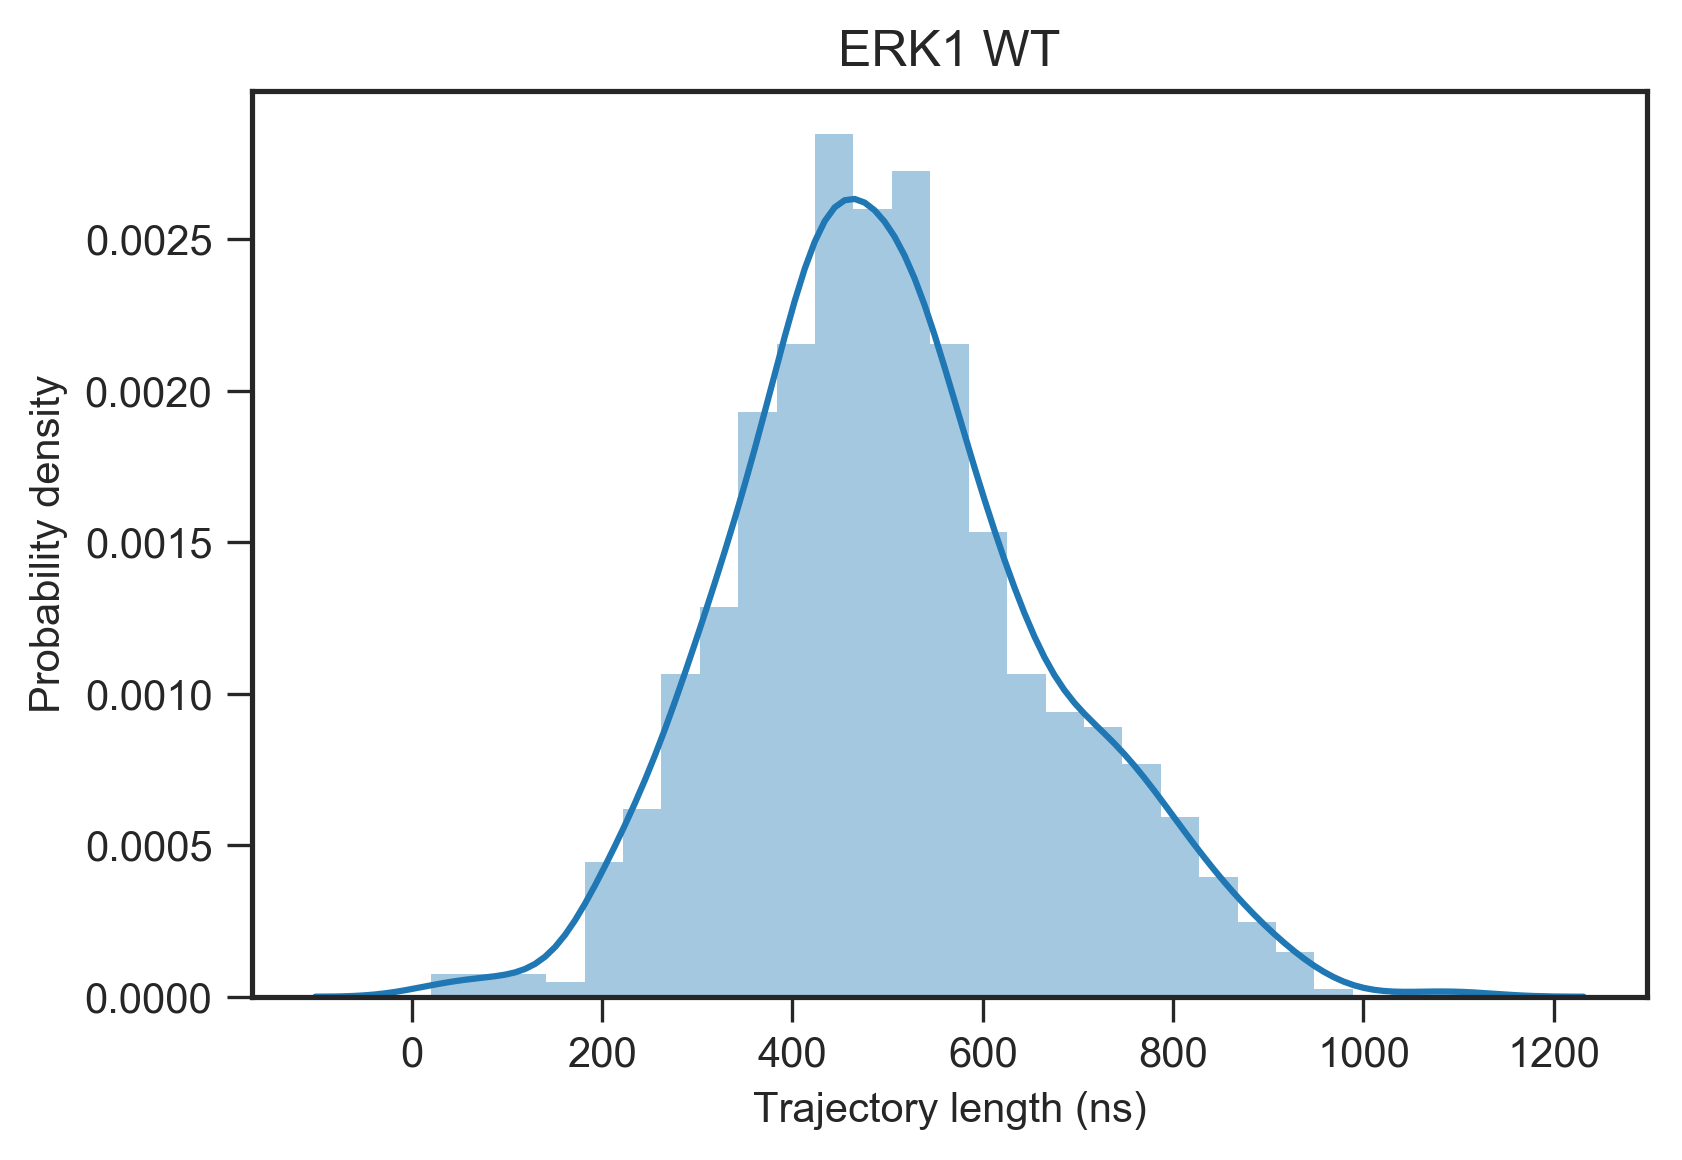

In [13]:
traj_lengths = np.load('traj_lengths_4runs.npy')   
plt.figure(dpi=300)
sns.distplot(np.array(traj_lengths[0])/2)
plt.xlabel('Trajectory length (ns)')
plt.ylabel('Probability density')
plt.title('ERK1 WT')
plt.show()

In [14]:
# ok let's plot distances

In [19]:
distances0 = np.load('distances0.npy')
dist0_concat = np.concatenate([distances0[i][0][100:] for i in range(len(distances0))])

In [20]:
distances1 = np.load('distances1.npy')
dist1_concat = np.concatenate([distances1[i][0][100:] for i in range(len(distances1))])

In [21]:
sns.set_context('notebook')

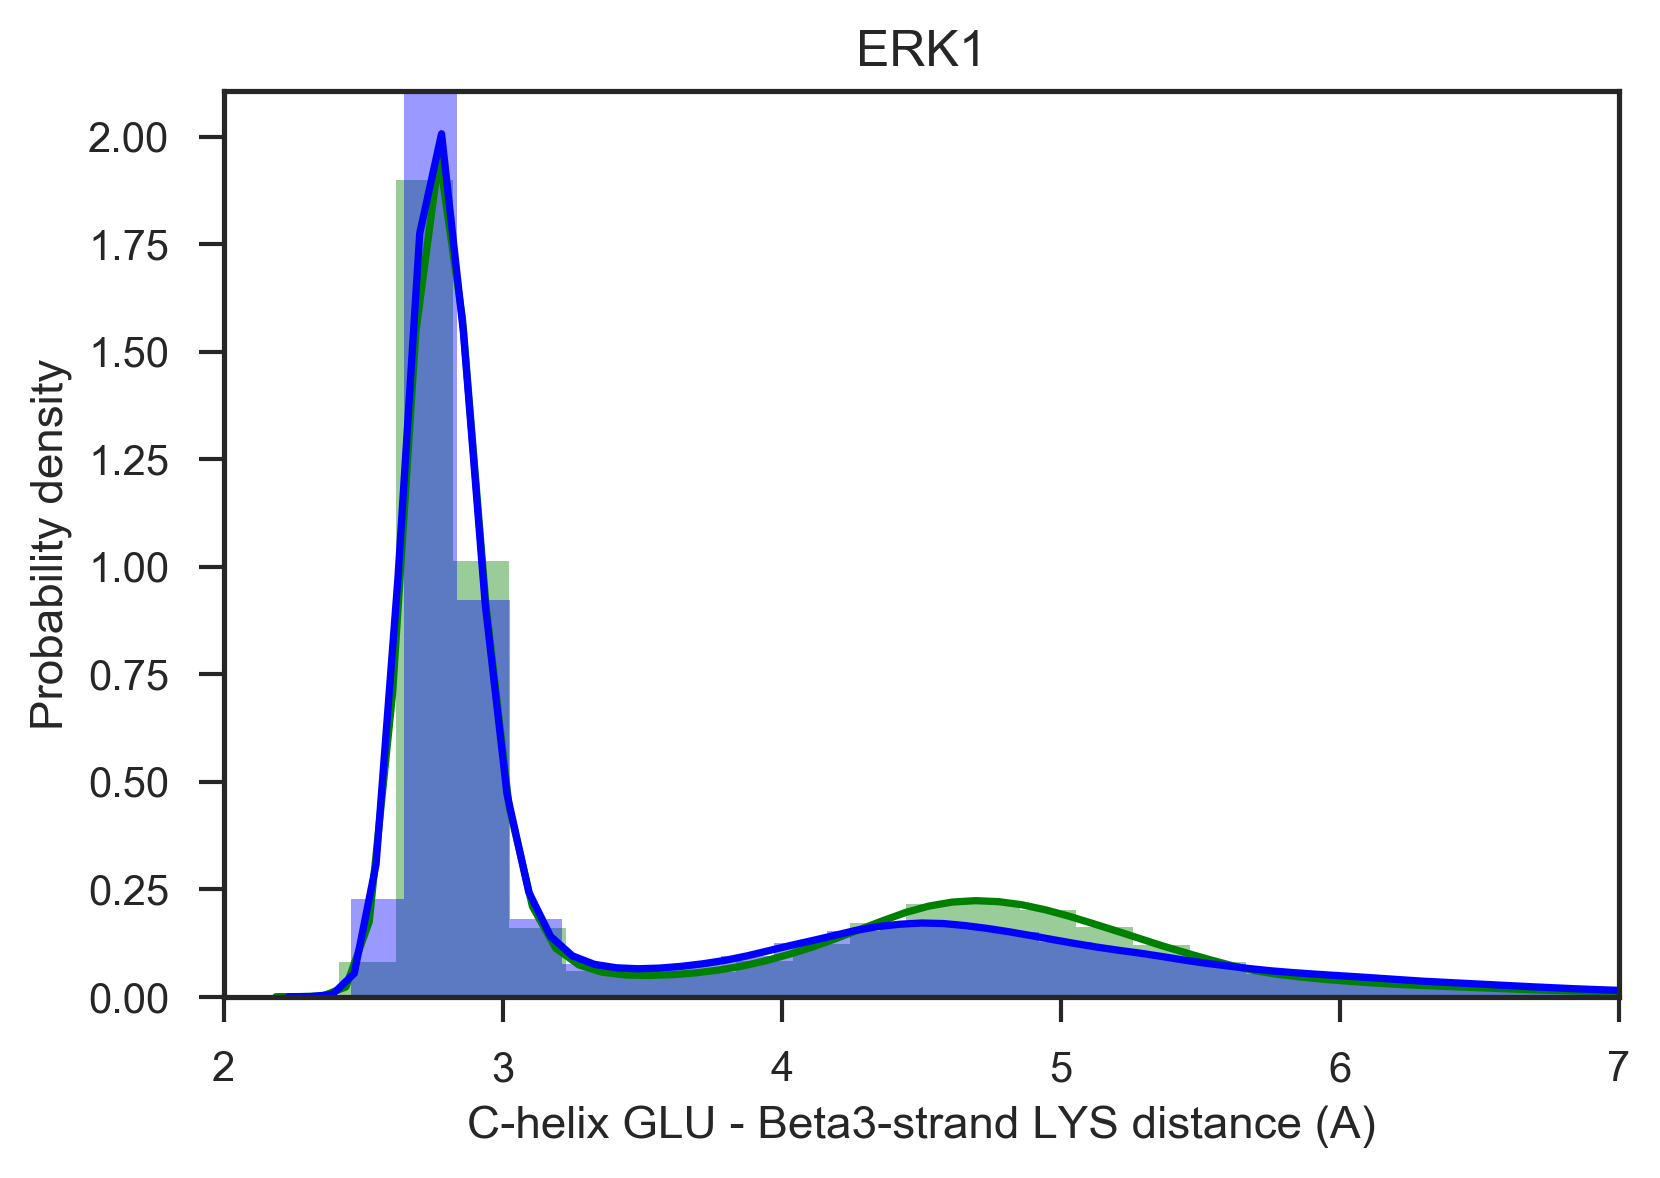

In [22]:
plt.figure(dpi=300)
sns.distplot(dist0_concat*10, color='green')
sns.distplot(dist1_concat*10, color='blue')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK1')
plt.show()

In [23]:
# no difference for ERK1

In [24]:
# ERK2

In [2]:
distances2 = np.load('distances2.npy')
dist2_concat = np.concatenate([distances2[i][0][100:] for i in range(len(distances2))])

In [3]:
distances3 = np.load('distances3.npy')
dist3_concat = np.concatenate([distances3[i][0][100:] for i in range(len(distances3))])

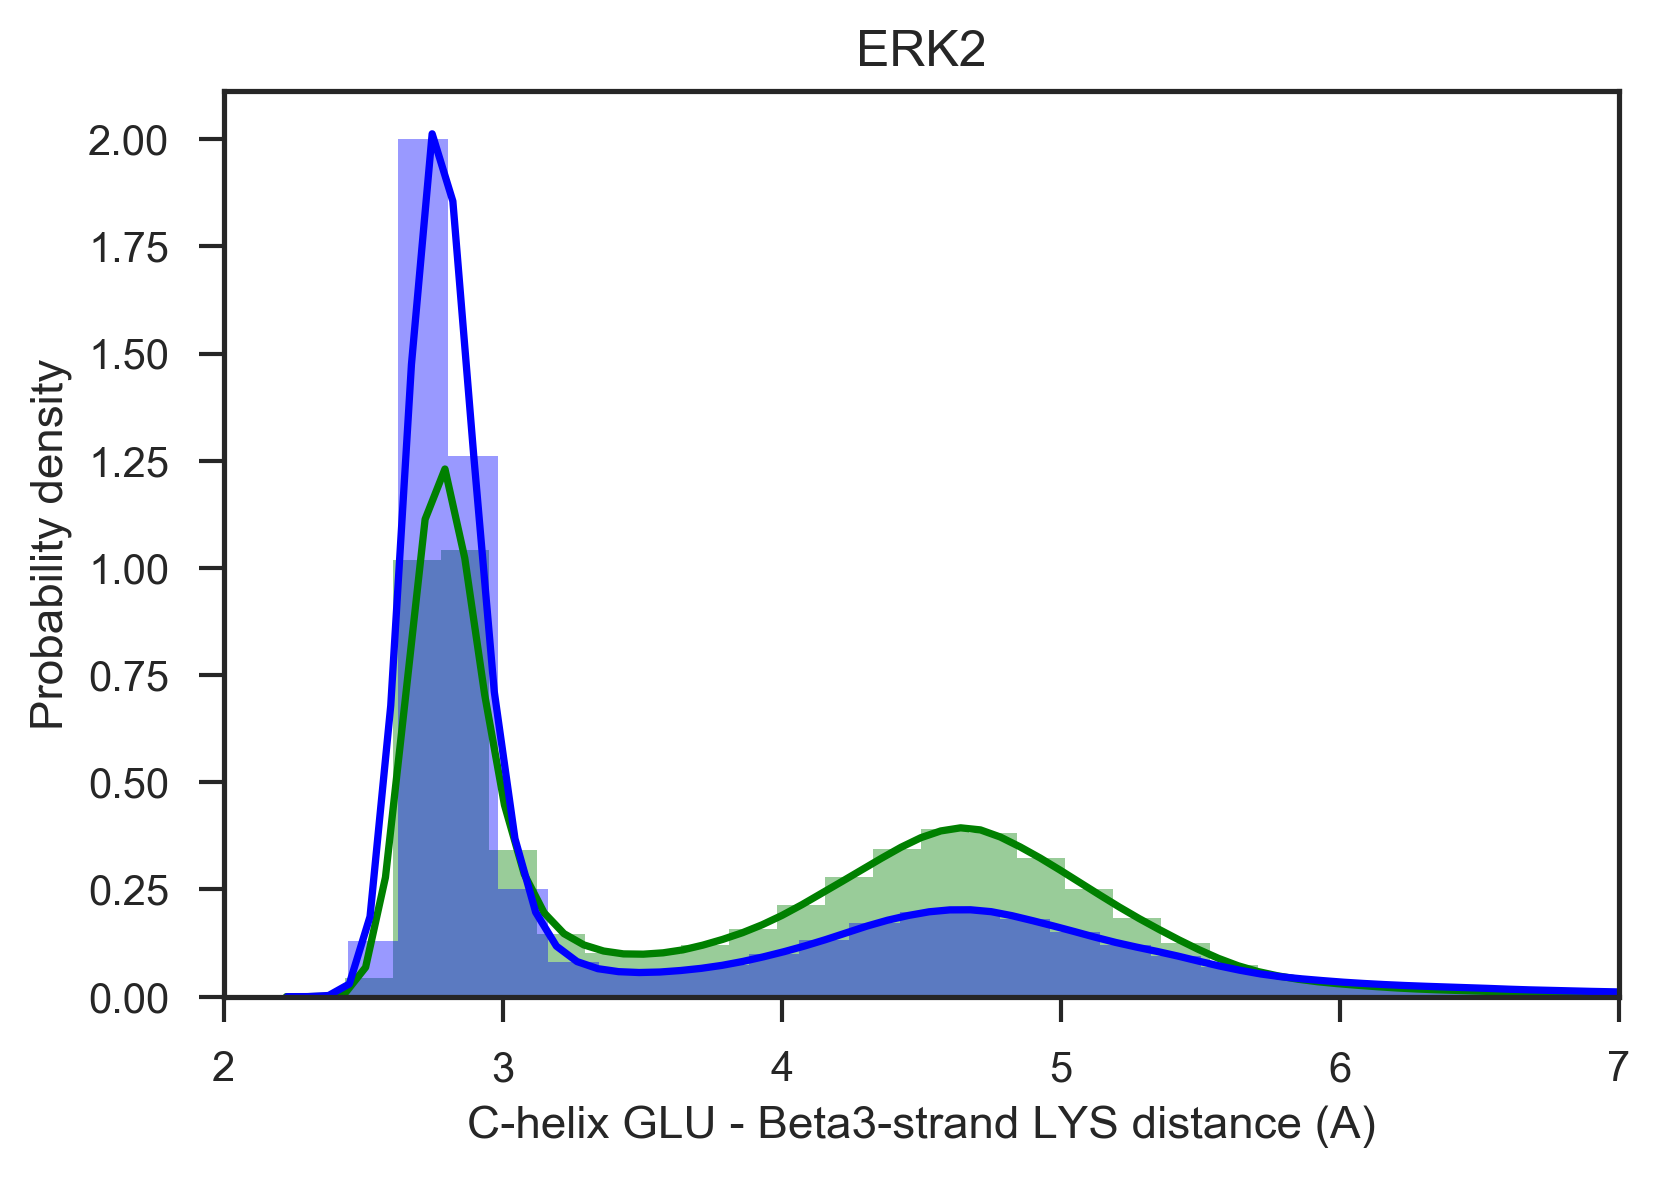

In [28]:
plt.figure(dpi=300)
sns.distplot(dist2_concat*10, color='green')
sns.distplot(dist3_concat*10, color='blue')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2')
plt.show()

In [29]:
# let's see what percentage of frames have and not have salt bridge

In [40]:
np.sum(dist2_concat < 0.35) / len(dist2_concat)

0.46690596948059493

In [41]:
np.sum(dist3_concat < 0.35) / len(dist3_concat)

0.67863437861727871

In [42]:
# compare ERK1

In [43]:
np.sum(dist0_concat < 0.35) / len(dist0_concat)

0.65601611338591026

In [44]:
np.sum(dist1_concat < 0.35) / len(dist1_concat)

0.68169975096805768

In [45]:
# good!

In [207]:
# now add the other 2 ERK2 mutants

In [4]:
distances4 = np.load('distances4.npy')
dist4_concat = np.concatenate([distances4[i][0][100:] for i in range(len(distances4))])

distances5 = np.load('distances5.npy')
dist5_concat = np.concatenate([distances5[i][0][100:] for i in range(len(distances5))])

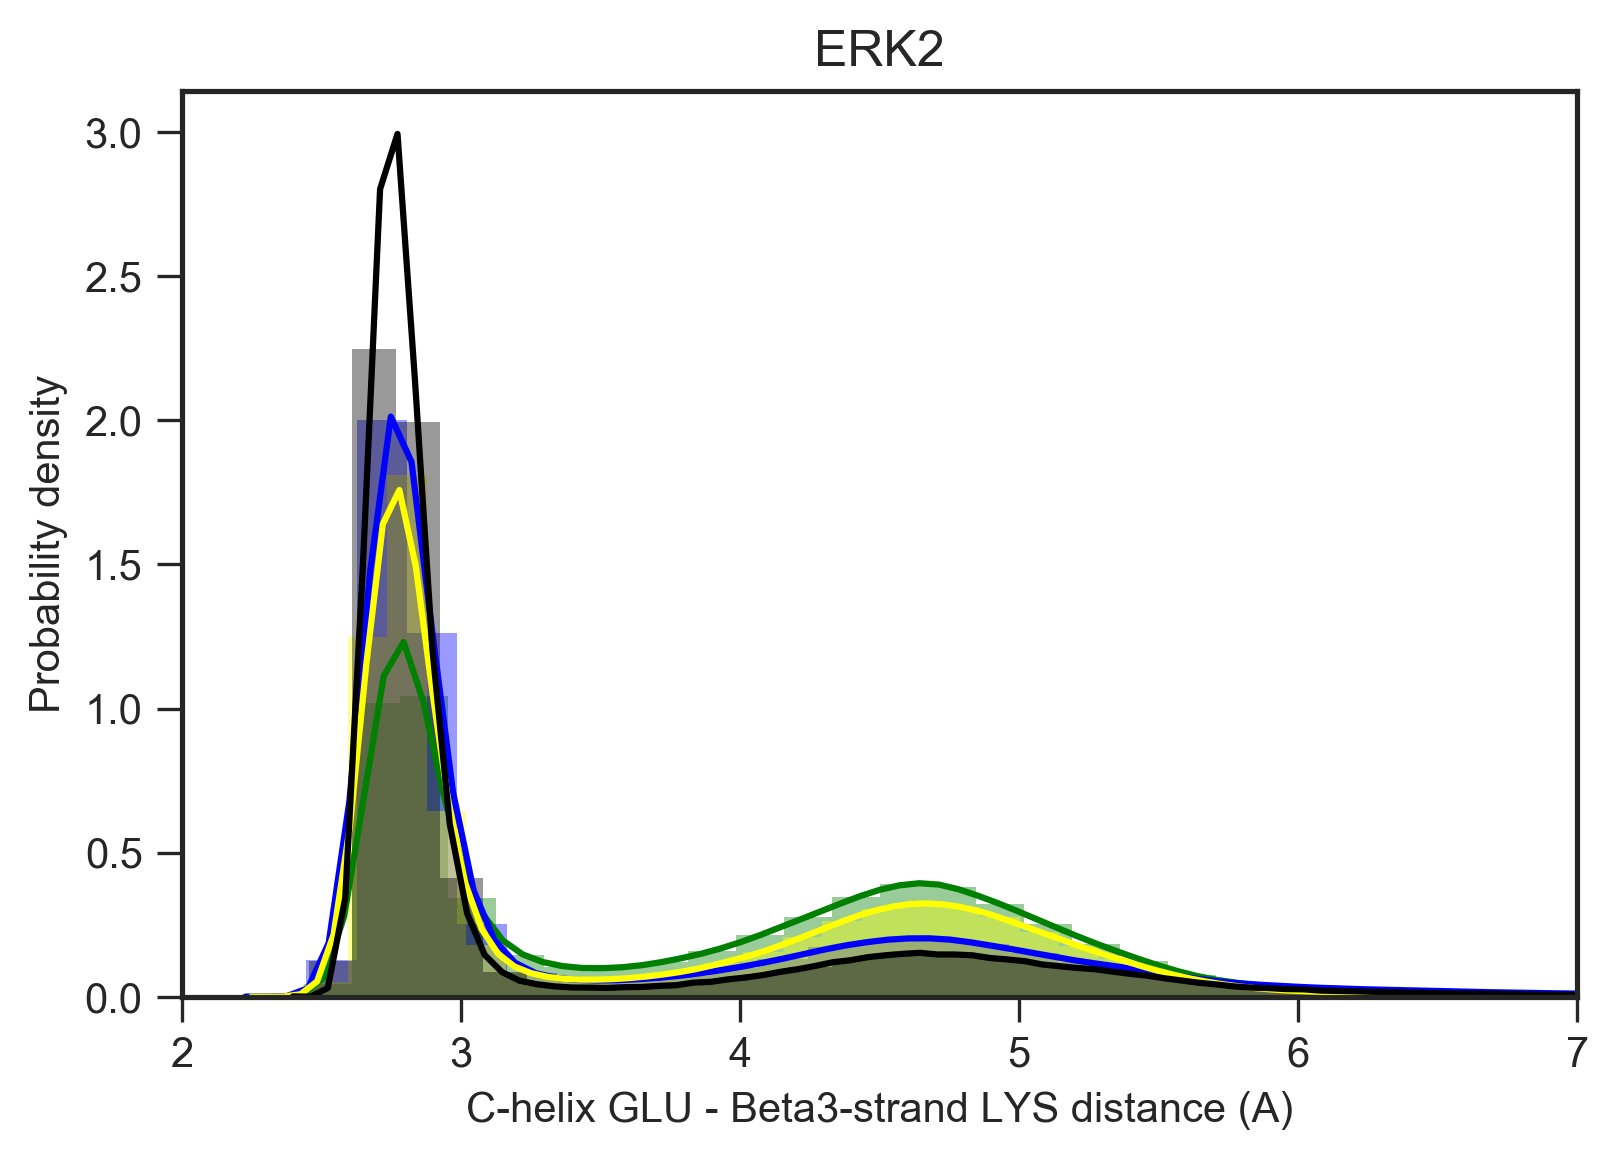

In [5]:
plt.figure(dpi=300)
sns.distplot(dist2_concat*10, color='green')
sns.distplot(dist3_concat*10, color='blue')
sns.distplot(dist4_concat*10, color='yellow')
sns.distplot(dist5_concat*10, color='black')
plt.xlabel('C-helix GLU - Beta3-strand LYS distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2')
plt.show()

In [6]:
# see fractions again

In [7]:
np.sum(dist2_concat < 0.35) / len(dist2_concat)

0.46690596948059493

In [8]:
np.sum(dist3_concat < 0.35) / len(dist3_concat)

0.67863437861727871

In [9]:
np.sum(dist4_concat < 0.35) / len(dist4_concat)

0.58068137399523057

In [10]:
np.sum(dist5_concat < 0.35) / len(dist5_concat)

0.76950391556977038

In [210]:
###################
# now RMSFs

In [2]:
rmsfs0 = np.load('rmsfs0.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [3]:
top

<mdtraj.Trajectory with 1 frames, 352 atoms, 352 residues, without unitcells at 0x1a0d4bada0>

In [4]:
rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [5]:
rmsfs1 = np.load('rmsfs1.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [6]:
rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [7]:
traj_lengths = np.load('traj_lengths_4runs.npy')
traj_lengths_new = []

for run in traj_lengths:
    traj_lengths_new.append([])
    for traj in run:
        if traj > 100:
            traj_lengths_new[-1].append(traj-100)
            
traj_lengths = traj_lengths_new            

In [8]:
sns.set_context("notebook", rc={"lines.linewidth": 0.5})

In [79]:
mkdir erk1_rmsf_pngs

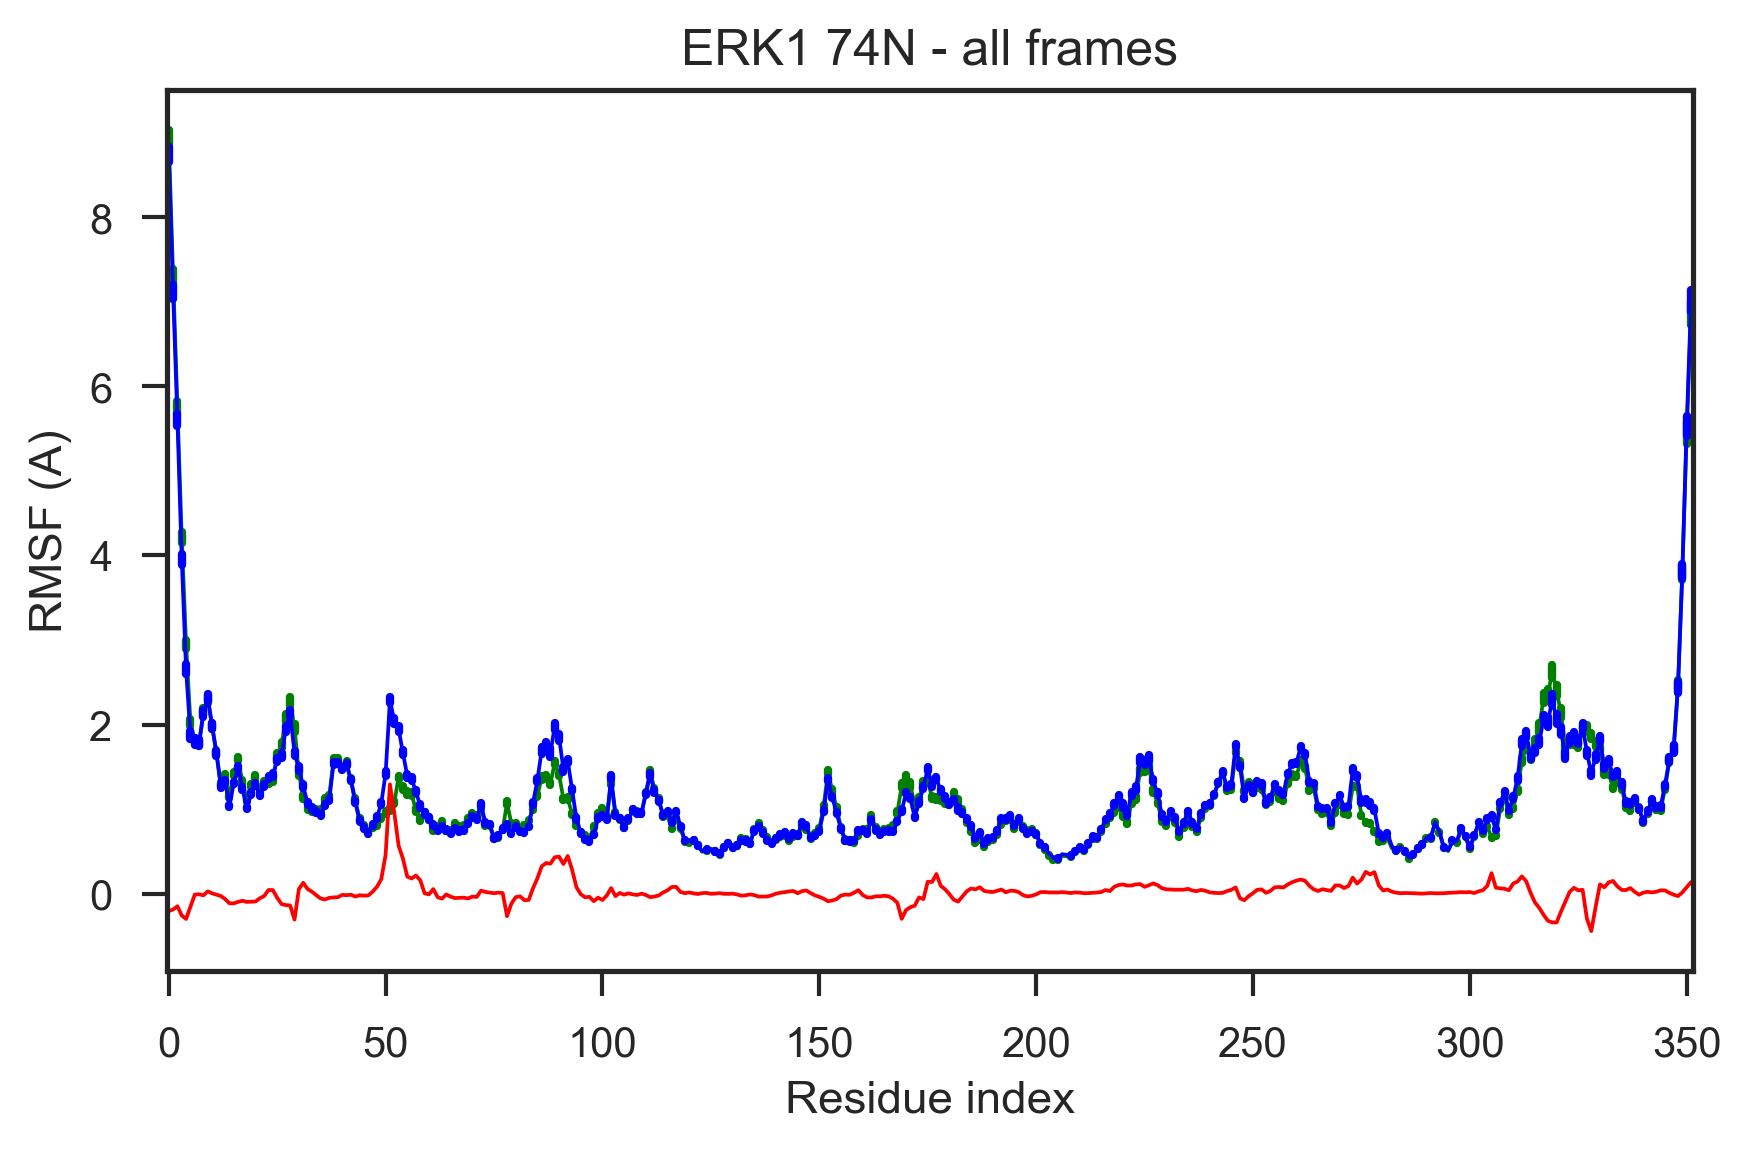

In [199]:
#for k, cutoff in enumerate([0,100,250,400,500,750,1000,1250,1500]):
for k, cutoff in enumerate([0]):
    
    a = np.array(rmsfs0_res)[np.argwhere(np.array(traj_lengths[0]) > cutoff)]
    b = np.array(rmsfs1_res)[np.argwhere(np.array(traj_lengths[1]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 51:
                continue
            if j > 51:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    # 2 lines below for weighted mean - only works at cutoff 0
    #sns.pointplot(x=np.arange(352), y=(np.concatenate([np.average(b, axis=0, weights=traj_lengths[1])[0][:51], np.average(b, axis=0, weights=traj_lengths[1])[0][52:]])-np.average(a, axis=0, weights=traj_lengths[0])[0])*10, markers='', errwidth=2, color='red')
    #sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='yellow')
    plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    #plt.title('ERK1 74N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[0]) > cutoff)), len(np.argwhere(np.array(traj_lengths[1]) > cutoff))))
    plt.title('ERK1 74N - all frames')
    plt.tight_layout()
    #plt.savefig('erk1_rmsf_pngs/%d.png' % k)
    plt.show()

In [92]:
# import moviepy.editor as mpy
# from glob import glob

In [93]:
# im = mpy.ImageSequenceClip(sorted(glob('erk1_rmsf_pngs/*.png')), fps=1)

In [94]:
# im.write_videofile('erk1.mp4')

In [97]:
# so no differences here - will try calculating RMSFs only from frames beyond certain length, first look at ERK2

In [98]:
####### ERK2

In [99]:
# WT

In [9]:
rmsfs2 = np.load('rmsfs2.npy')
top = md.load('ERK2_WT.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [10]:
rmsfs = rmsfs2
rmsfs2_res = []
rmsfs_res = rmsfs2_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [202]:
# 55N

In [203]:
rmsfs3 = np.load('rmsfs3.npy')
top = md.load('ERK2_55N.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [204]:
rmsfs = rmsfs3
rmsfs3_res = []
rmsfs_res = rmsfs3_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [340]:
traj_lengths = np.load('traj_lengths_4runs.npy')
traj_lengths_new = []

for run in traj_lengths:
    traj_lengths_new.append([])
    for traj in run:
        if traj > 100:
            traj_lengths_new[-1].append(traj-100)
            
traj_lengths = traj_lengths_new            

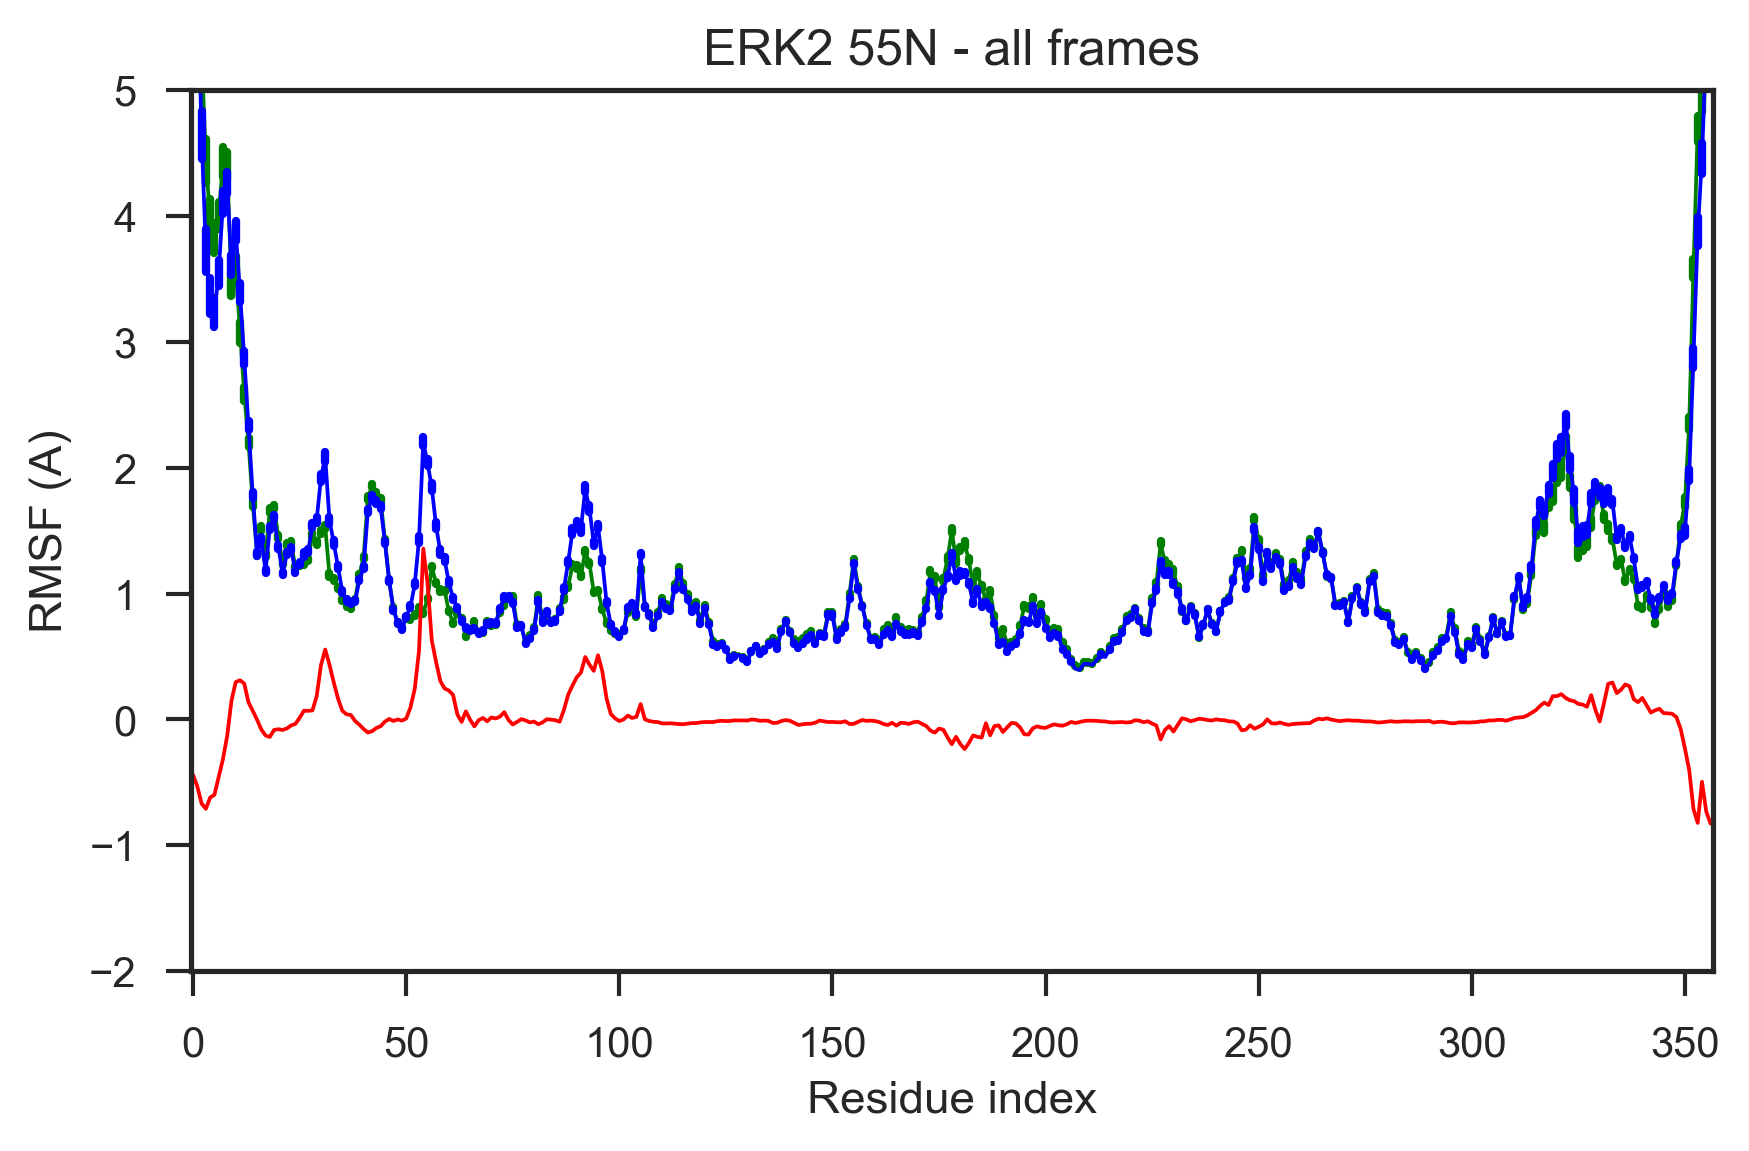

In [206]:
#for k, cutoff in enumerate([0,50,100,200,300,400,500,600]):
for k, cutoff in enumerate([0]):
    
    a = np.array(rmsfs2_res)[np.argwhere(np.array(traj_lengths[2]) > cutoff)]
    b = np.array(rmsfs3_res)[np.argwhere(np.array(traj_lengths[3]) > cutoff)]

    x0 = []
    y0 = []

    for i in range(len(a)):
        for j in range(len(a[i][0])):
            x0.append(j)
            y0.append(a[i][0][j]*10)

    x1 = []
    y1 = []

    for i in range(len(b)):
        for j in range(len(b[i][0])):
            if j == 54:
                continue
            if j > 54:
                x1.append(j-1)
                y1.append(b[i][0][j]*10)
            else:
                x1.append(j)
                y1.append(b[i][0][j]*10)            

    plt.figure(dpi=300)
    sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
    sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
    sns.pointplot(x=np.arange(357), y=(np.concatenate([np.mean(b, axis=0)[0][:54], np.mean(b, axis=0)[0][55:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
    plt.ylim((-2,5))
    plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
    plt.xlabel('Residue index')
    plt.ylabel('RMSF (A)')
    #plt.title('ERK2 55N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[3]) > cutoff))))
    plt.title('ERK2 55N - all frames')
    plt.tight_layout()
    #plt.savefig('erk1_rmsf_pngs/%d.png' % k)

In [329]:
# Q102M

In [11]:
rmsfs4 = np.load('rmsfs4.npy')
top = md.load('ERK2_Q102M.pdb')
top = top.atom_slice(top.top.select('name CA'))

rmsfs = rmsfs4
rmsfs4_res = []
rmsfs_res = rmsfs4_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

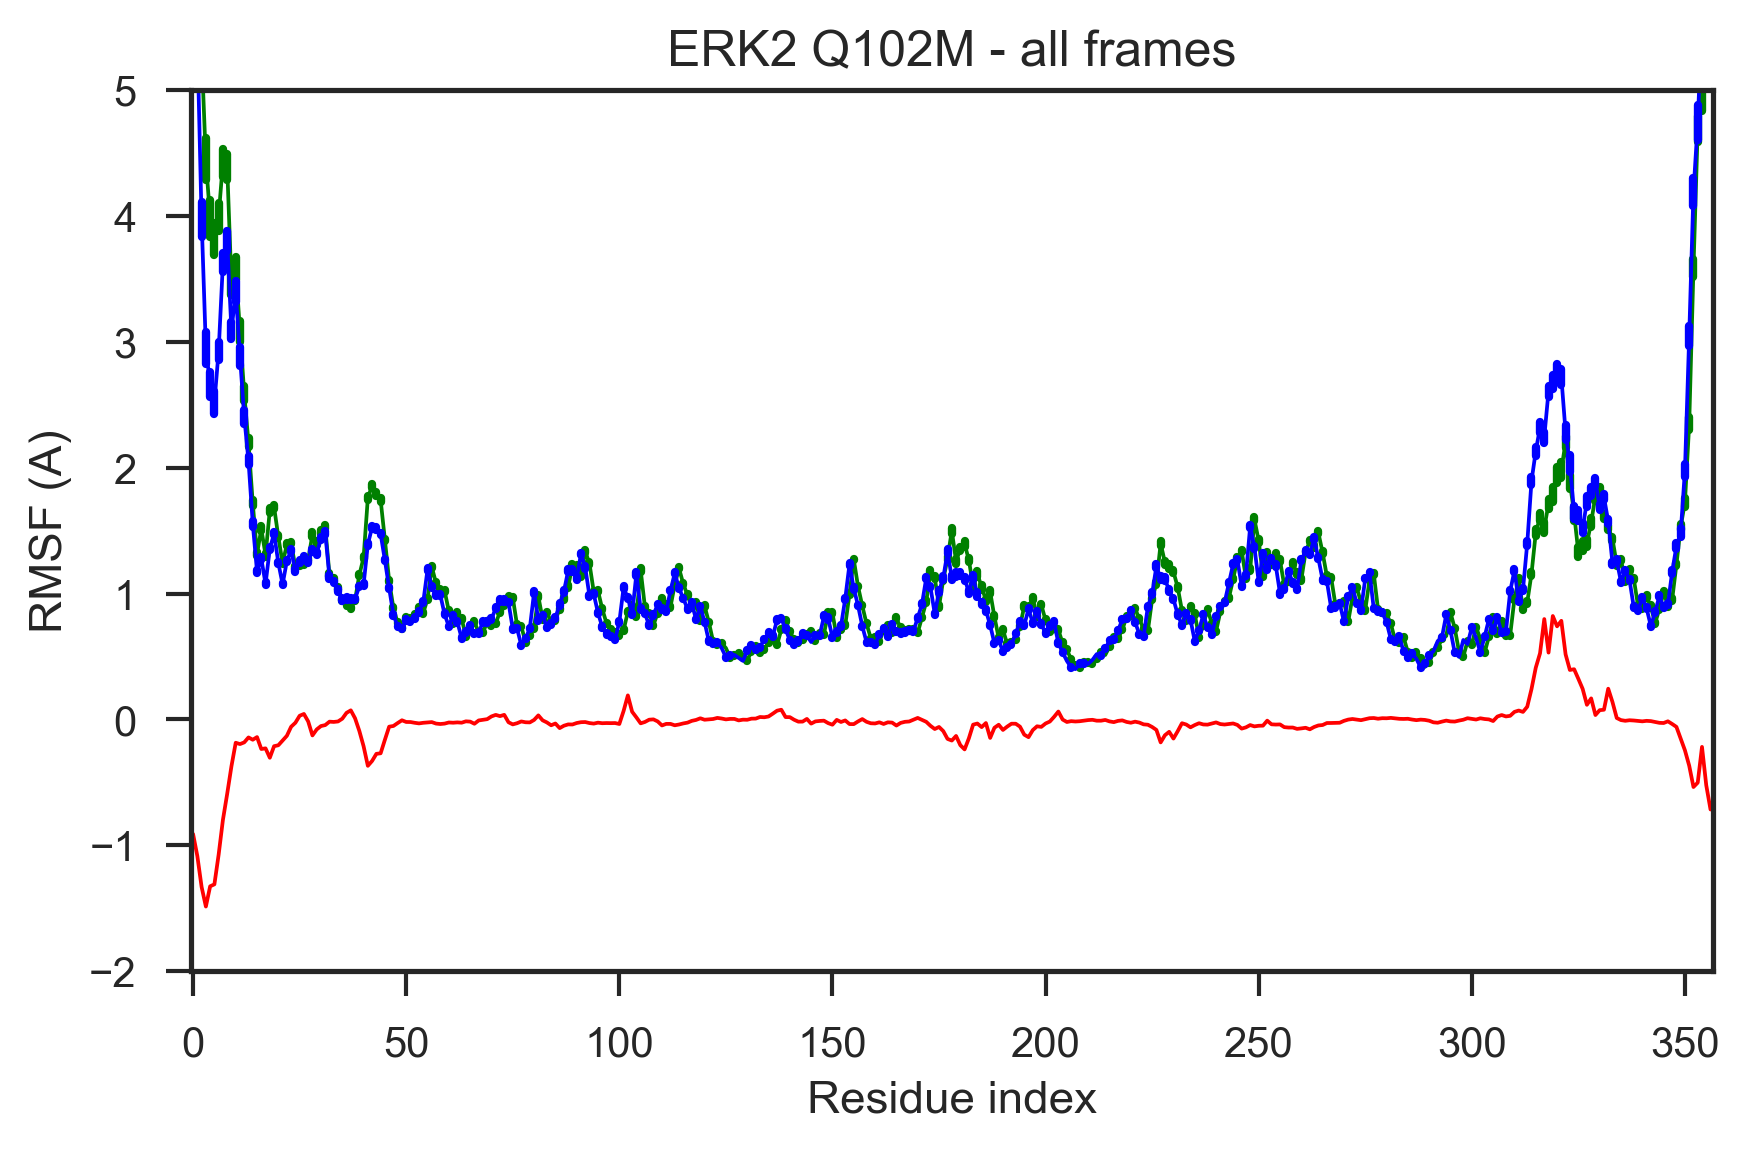

In [12]:
a = np.array(rmsfs2_res)[np.array([[x] for x in np.arange(len(rmsfs2_res))])]
b = np.array(rmsfs4_res)[np.array([[x] for x in np.arange(len(rmsfs4_res))])]

x0 = []
y0 = []

for i in range(len(a)):
    for j in range(len(a[i][0])):
        x0.append(j)
        y0.append(a[i][0][j]*10)

x1 = []
y1 = []

for i in range(len(b)):
    for j in range(len(b[i][0])):
        if j == 54:
            continue
        if j > 54:
            x1.append(j-1)
            y1.append(b[i][0][j]*10)
        else:
            x1.append(j)
            y1.append(b[i][0][j]*10)            

plt.figure(dpi=300)
sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
sns.pointplot(x=np.arange(357), y=(np.concatenate([np.mean(b, axis=0)[0][:54], np.mean(b, axis=0)[0][54:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
plt.ylim((-2,5))
plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
plt.xlabel('Residue index')
plt.ylabel('RMSF (A)')
#plt.title('ERK2 55N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[3]) > cutoff))))
plt.title('ERK2 Q102M - all frames')
plt.tight_layout()
#plt.savefig('erk1_rmsf_pngs/%d.png' % k)

In [13]:
# 55N - Q102M

In [14]:
rmsfs5 = np.load('rmsfs5.npy')
top = md.load('ERK2_55N_Q102M.pdb')
top = top.atom_slice(top.top.select('name CA'))

rmsfs = rmsfs5
rmsfs5_res = []
rmsfs_res = rmsfs5_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

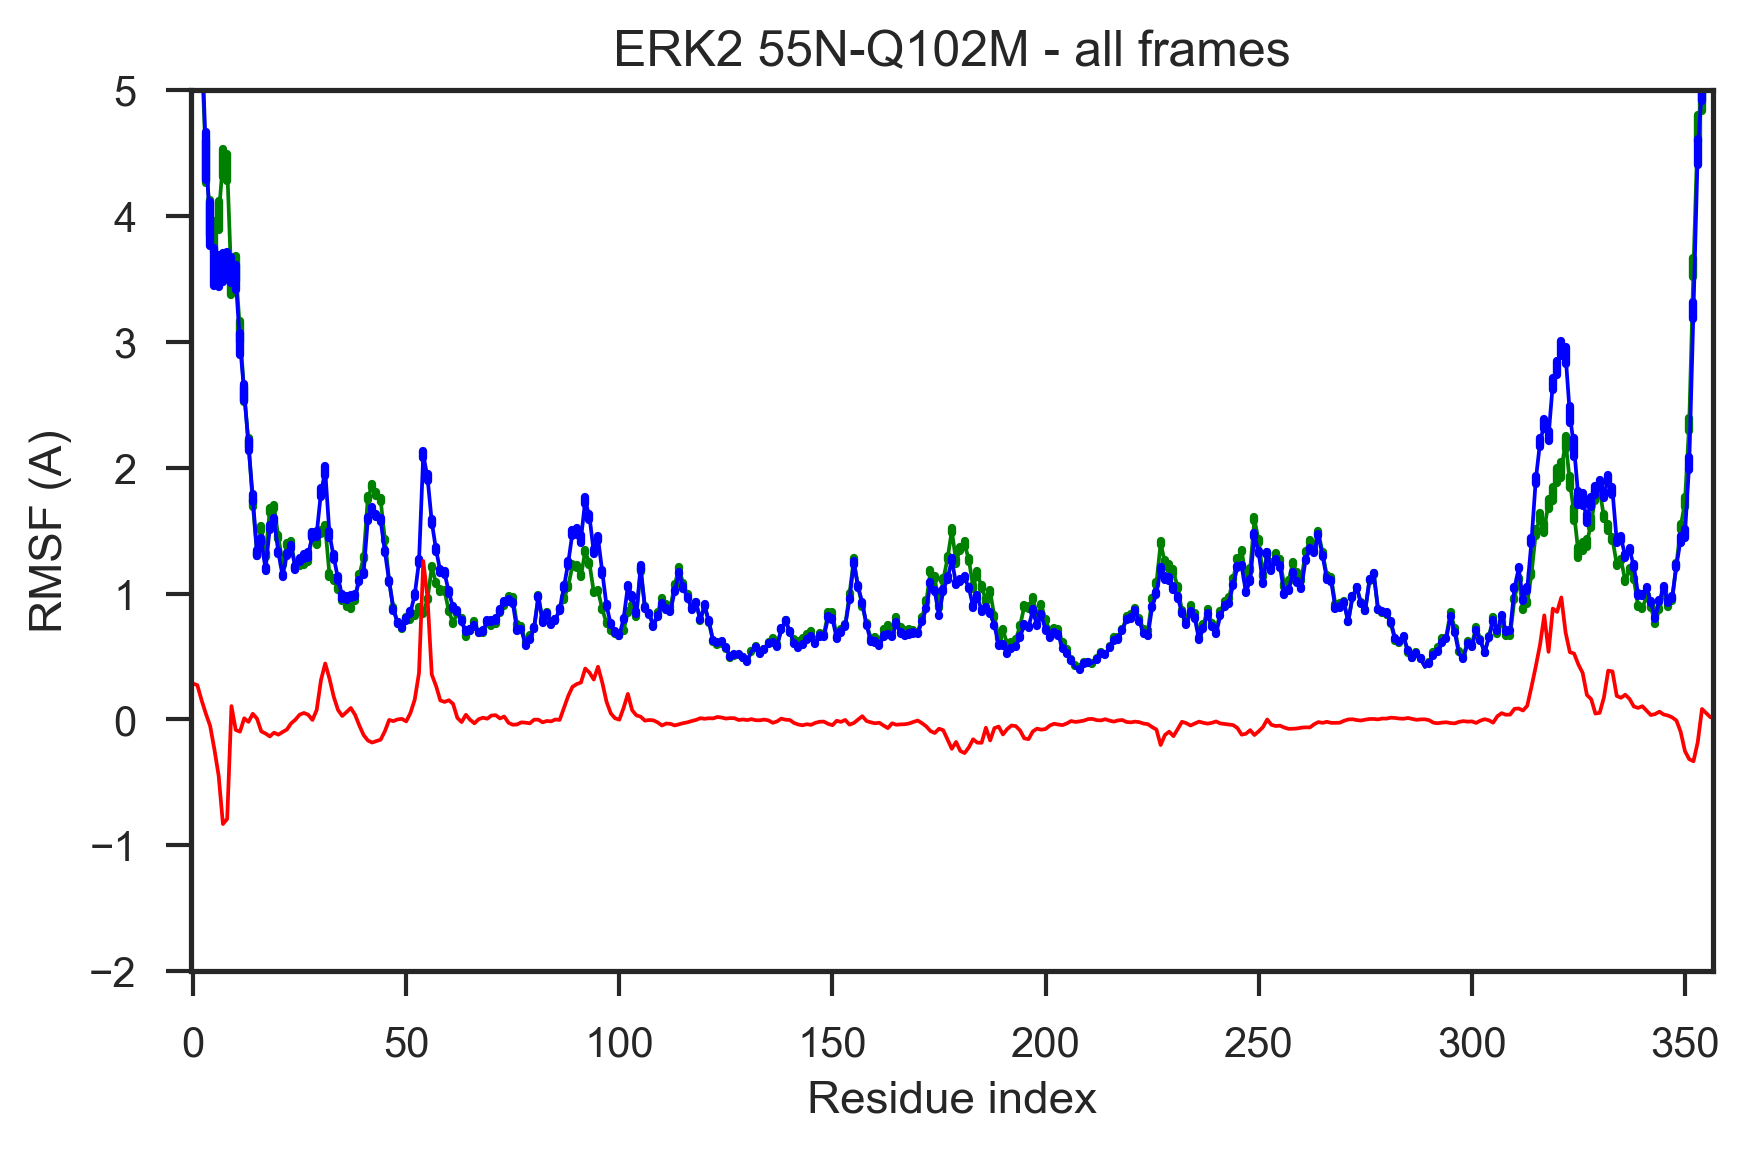

In [16]:
a = np.array(rmsfs2_res)[np.array([[x] for x in np.arange(len(rmsfs2_res))])]
b = np.array(rmsfs5_res)[np.array([[x] for x in np.arange(len(rmsfs5_res))])]

x0 = []
y0 = []

for i in range(len(a)):
    for j in range(len(a[i][0])):
        x0.append(j)
        y0.append(a[i][0][j]*10)

x1 = []
y1 = []

for i in range(len(b)):
    for j in range(len(b[i][0])):
        if j == 54:
            continue
        if j > 54:
            x1.append(j-1)
            y1.append(b[i][0][j]*10)
        else:
            x1.append(j)
            y1.append(b[i][0][j]*10)            

plt.figure(dpi=300)
sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
sns.pointplot(x=np.arange(357), y=(np.concatenate([np.mean(b, axis=0)[0][:54], np.mean(b, axis=0)[0][55:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='red')
plt.ylim((-2,5))
plt.xticks(np.arange(0,len(rmsfs2_res[0]),50), np.arange(0,len(rmsfs2_res[0]),50))
plt.xlabel('Residue index')
plt.ylabel('RMSF (A)')
#plt.title('ERK2 55N - longer than %d ns - wt: %d, mut: %d trajs' % (cutoff/2, len(np.argwhere(np.array(traj_lengths[2]) > cutoff)), len(np.argwhere(np.array(traj_lengths[3]) > cutoff))))
plt.title('ERK2 55N-Q102M - all frames')
plt.tight_layout()
#plt.savefig('erk1_rmsf_pngs/%d.png' % k)

In [146]:
# ok let's now calculate the RMSF for ERK1, taking frames only after 250, 500 ns

In [148]:
# ok back with these for ERK1

In [164]:
rmsfs0 = np.load('rmsfs0_over250ns.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [165]:
rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [166]:
rmsfs1 = np.load('rmsfs1_over250ns.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [167]:
rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

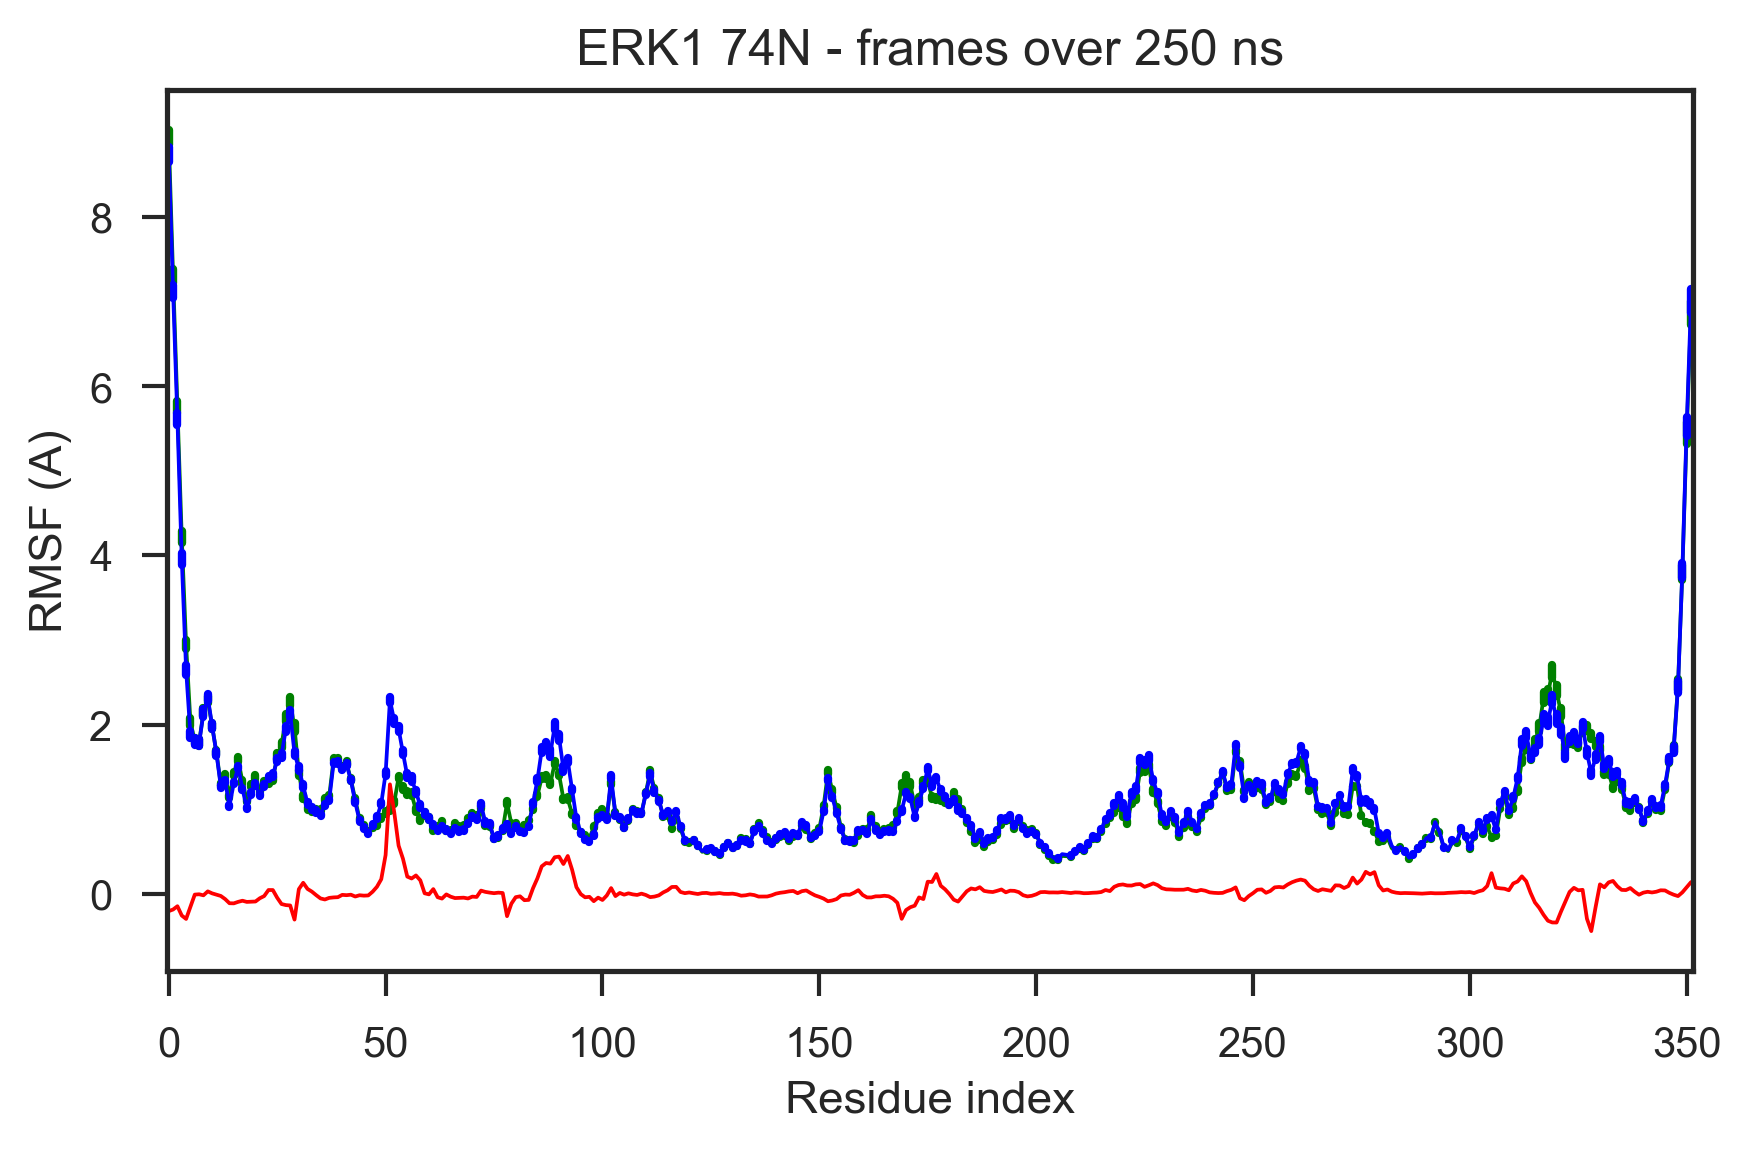

In [187]:
a = np.array(rmsfs0_res)
b = np.array(rmsfs1_res)

x0 = []
y0 = []

for i in range(len(a)):
    for j in range(len(a[i])):
        x0.append(j)
        y0.append(a[i][j]*10)

x1 = []
y1 = []

for i in range(len(b)):
    for j in range(len(b[i])):
        if j == 51:
            continue
        if j > 51:
            x1.append(j-1)
            y1.append(b[i][j]*10)
        else:
            x1.append(j)
            y1.append(b[i][j]*10)            

plt.figure(dpi=300)
sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[:51], np.mean(b, axis=0)[52:]])-np.mean(a, axis=0))*10, markers='', errwidth=2, color='red')
# 2 lines below for weighted mean - only works at cutoff 0
#sns.pointplot(x=np.arange(352), y=(np.concatenate([np.average(b, axis=0, weights=traj_lengths[1])[0][:51], np.average(b, axis=0, weights=traj_lengths[1])[0][52:]])-np.average(a, axis=0, weights=traj_lengths[0])[0])*10, markers='', errwidth=2, color='red')
#sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='yellow')
plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
plt.xlabel('Residue index')
plt.ylabel('RMSF (A)')
plt.title('ERK1 74N - frames over 250 ns')
plt.tight_layout()
#plt.savefig('erk1_rmsf_pngs/%d.png' % k)
plt.show()

In [188]:
rmsfs0 = np.load('rmsfs0_over500ns.npy')
top = md.load('ERK1_WT.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [189]:
rmsfs = rmsfs0
rmsfs0_res = []
rmsfs_res = rmsfs0_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

In [190]:
rmsfs1 = np.load('rmsfs1_over500ns.npy')
top = md.load('ERK1_74N.pdb')
top = top.atom_slice(top.top.select('name CA'))

In [191]:
rmsfs = rmsfs1
rmsfs1_res = []
rmsfs_res = rmsfs1_res

for traj_no in range(len(rmsfs)):

    rmsfs_res_ = []

    i = 0

    for residue in list(top.top.residues):
        no_atoms = len(list(residue.atoms))
        rmsfs_res_.append(np.mean(rmsfs[traj_no][i:i+no_atoms]))
        i += no_atoms
    
    rmsfs_res.append(rmsfs_res_)

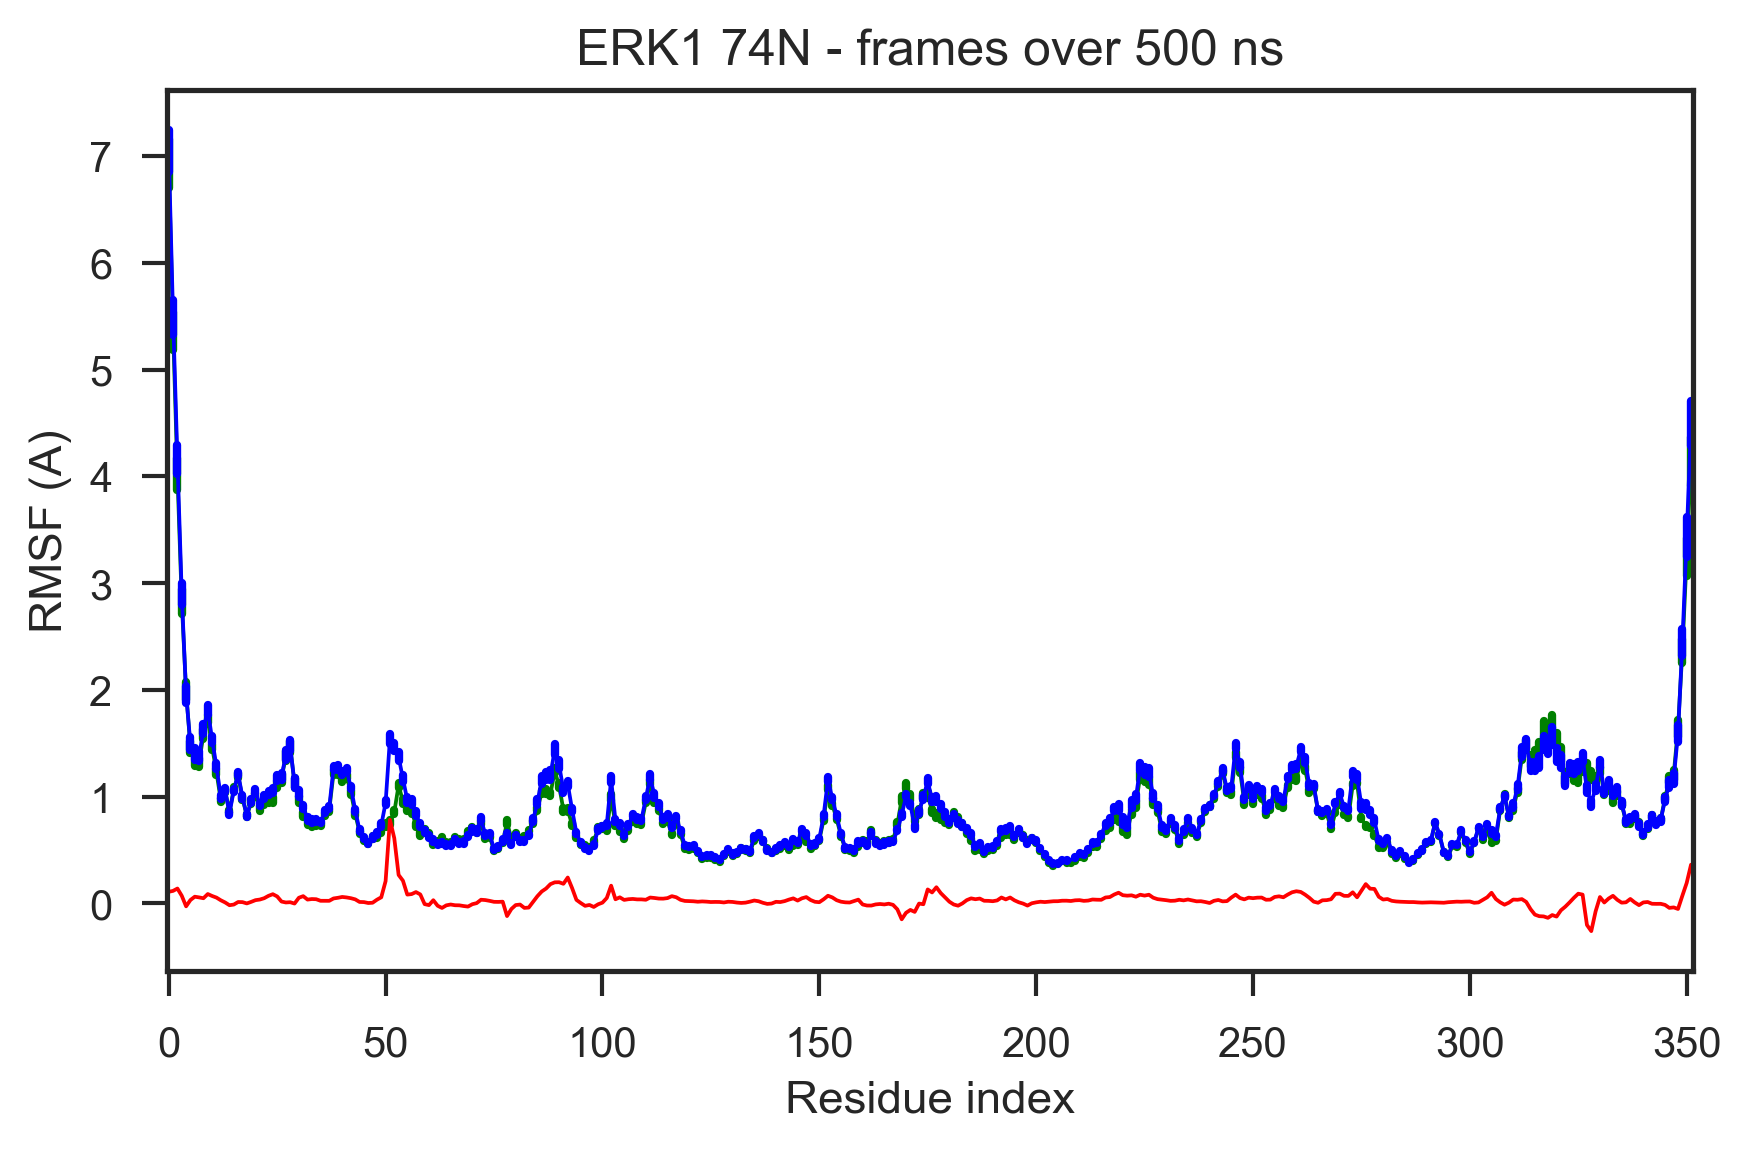

In [192]:
a = np.array(rmsfs0_res)
b = np.array(rmsfs1_res)

x0 = []
y0 = []

for i in range(len(a)):
    for j in range(len(a[i])):
        x0.append(j)
        y0.append(a[i][j]*10)

x1 = []
y1 = []

for i in range(len(b)):
    for j in range(len(b[i])):
        if j == 51:
            continue
        if j > 51:
            x1.append(j-1)
            y1.append(b[i][j]*10)
        else:
            x1.append(j)
            y1.append(b[i][j]*10)            

plt.figure(dpi=300)
sns.pointplot(x=x0, y=y0, markers='', errwidth=2, color='green', label='WT')
sns.pointplot(x=x1, y=y1, markers='', errwidth=2, color='blue', label='74N')
sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[:51], np.mean(b, axis=0)[52:]])-np.mean(a, axis=0))*10, markers='', errwidth=2, color='red')
# 2 lines below for weighted mean - only works at cutoff 0
#sns.pointplot(x=np.arange(352), y=(np.concatenate([np.average(b, axis=0, weights=traj_lengths[1])[0][:51], np.average(b, axis=0, weights=traj_lengths[1])[0][52:]])-np.average(a, axis=0, weights=traj_lengths[0])[0])*10, markers='', errwidth=2, color='red')
#sns.pointplot(x=np.arange(352), y=(np.concatenate([np.mean(b, axis=0)[0][:51], np.mean(b, axis=0)[0][52:]])-np.mean(a, axis=0)[0])*10, markers='', errwidth=2, color='yellow')
plt.xticks(np.arange(0,len(rmsfs0_res[0]),50), np.arange(0,len(rmsfs0_res[0]),50))
plt.xlabel('Residue index')
plt.ylabel('RMSF (A)')
plt.title('ERK1 74N - frames over 500 ns')
plt.tight_layout()
#plt.savefig('erk1_rmsf_pngs/%d.png' % k)
plt.show()

In [11]:
#####################

In [12]:
# a long list of distances received from Liam - let's try them out!

In [13]:
# I have them in ERK2 numbering, let's translate to simulation 0-index and calculate for ERK2 first

In [14]:
# For key catalytic residues mentioned in the manu

# E69-F166 
# F166-G167 - this doesn't make sense, does it? (with closest heavy atoms - maybe it's about a side-chain distance)
# K52-E69
# D165-K52

# For spines
# Regulatory spine:
# I84-L73
# L73-F166
# F166-H145
# H145-D208

# Catalytic spine:
# V37-A50
# A50-L154
# L154-L153 - no sense
# L153-L155 
# L153-M106 
# L155-M106
# M106-I215
# I215-M219

In [17]:
# just have to subtract 2 from these indexes (for WT)

In [19]:
# ok back with the distances - first 55N only vs WT

In [20]:
distances2 = np.load('distances2_liam.npy')
dist2_concat = np.concatenate([distances2[i][0][100:] for i in range(len(distances2))])

distances3 = np.load('distances3_liam.npy')
dist3_concat = np.concatenate([distances3[i][0][100:] for i in range(len(distances3))])

In [210]:
# plt.figure(dpi=100)
# sns.distplot(dist2_concat[:,0]*10, color='green')
# sns.distplot(dist3_concat[:,0]*10, color='blue')
# plt.xlabel('Inter-residue distance (A)')
# plt.ylabel('Probability density')
# plt.xlim((2,7))
# plt.title('ERK2 WT (g) - 55N (b)')
# plt.show()

In [148]:
# this one (index 0) distance is very interesting - two peaks before 4A - look at some frames

In [149]:
# # this one needs larger distances - residues never in contact, mistake on the list?
# plt.figure(dpi=100)
# sns.distplot(dist2_concat[:,8]*10, color='green')
# sns.distplot(dist3_concat[:,8]*10, color='blue')
# plt.xlabel('Inter-residue distance (A)')
# plt.ylabel('Probability density')
# plt.xlim((5,10))
# plt.title('ERK2 WT (g) - 55N (b)')
# plt.show()

In [150]:
# # as above here
# plt.figure(dpi=100)
# sns.distplot(dist2_concat[:,10]*10, color='green')
# sns.distplot(dist3_concat[:,10]*10, color='blue')
# plt.xlabel('Inter-residue distance (A)')
# plt.ylabel('Probability density')
# plt.xlim((5,10))
# plt.title('ERK2 WT (g) - 55N (b)')
# plt.show()

In [153]:
# plt.figure(dpi=100)
# sns.distplot(dist2_concat[:,12]*10, color='green')
# sns.distplot(dist3_concat[:,12]*10, color='blue')
# plt.xlabel('Inter-residue distance (A)')
# plt.ylabel('Probability density')
# plt.xlim((12,17))
# plt.title('ERK2 WT (g) - 55N (b)')
# plt.show()

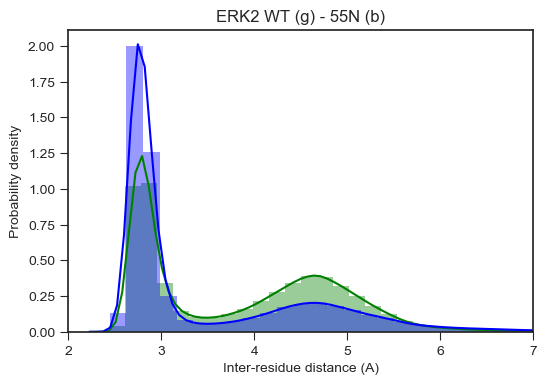

In [154]:
plt.figure(dpi=100)
sns.distplot(dist2_concat[:,1]*10, color='green')
sns.distplot(dist3_concat[:,1]*10, color='blue')
plt.xlabel('Inter-residue distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2 WT (g) - 55N (b)')
plt.show()

In [ ]:
# percentage formed

In [167]:
np.sum(dist2_concat[:,1] < 0.35) / len(dist2_concat[:,1])

0.46690596948059493

In [168]:
np.sum(dist3_concat[:,1] < 0.35) / len(dist3_concat[:,1])

0.67863437861727871

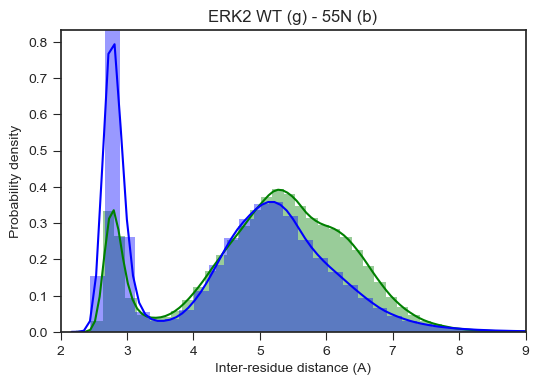

In [159]:
plt.figure(dpi=100)
sns.distplot(dist2_concat[:,2]*10, color='green')
sns.distplot(dist3_concat[:,2]*10, color='blue')
plt.xlabel('Inter-residue distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,9))
plt.title('ERK2 WT (g) - 55N (b)')
plt.show()

In [169]:
np.sum(dist2_concat[:,2] < 0.35) / len(dist2_concat[:,2])

0.13751984203801929

In [170]:
np.sum(dist3_concat[:,2] < 0.35) / len(dist3_concat[:,2])

0.31663246694026448

In [72]:
# potential differences are in:
# 0, 1 (that we knew already), 2
# 3, 5, 7, 8, 11

In [73]:
# check with KS test

In [75]:
import scipy

In [90]:
np.sqrt((len(dist2_concat[:,0]) + len(dist2_concat[:,1])) / len(dist2_concat[:,0])*len(dist2_concat[:,1]))

1344.6300606486529

In [127]:
scipy.stats.ks_2samp(dist2_concat[:,8], dist3_concat[:,8])

Ks_2sampResult(statistic=0.13398195313787614, pvalue=0.0)

In [128]:
# different for sure: 1, 2

In [129]:
# maybe different: 8

In [130]:
# let's see, for 1 and 2, where trajectories started

In [138]:
distances2[0][0].shape

(1250, 14)

In [139]:
dist2_1stframes = []

for traj in distances2:
    dist2_1stframes.append(traj[0][0])

In [141]:
len(dist2_1stframes)

1000

In [142]:
dist3_1stframes = []

for traj in distances3:
    dist3_1stframes.append(traj[0][0])

In [143]:
len(dist3_1stframes)

999

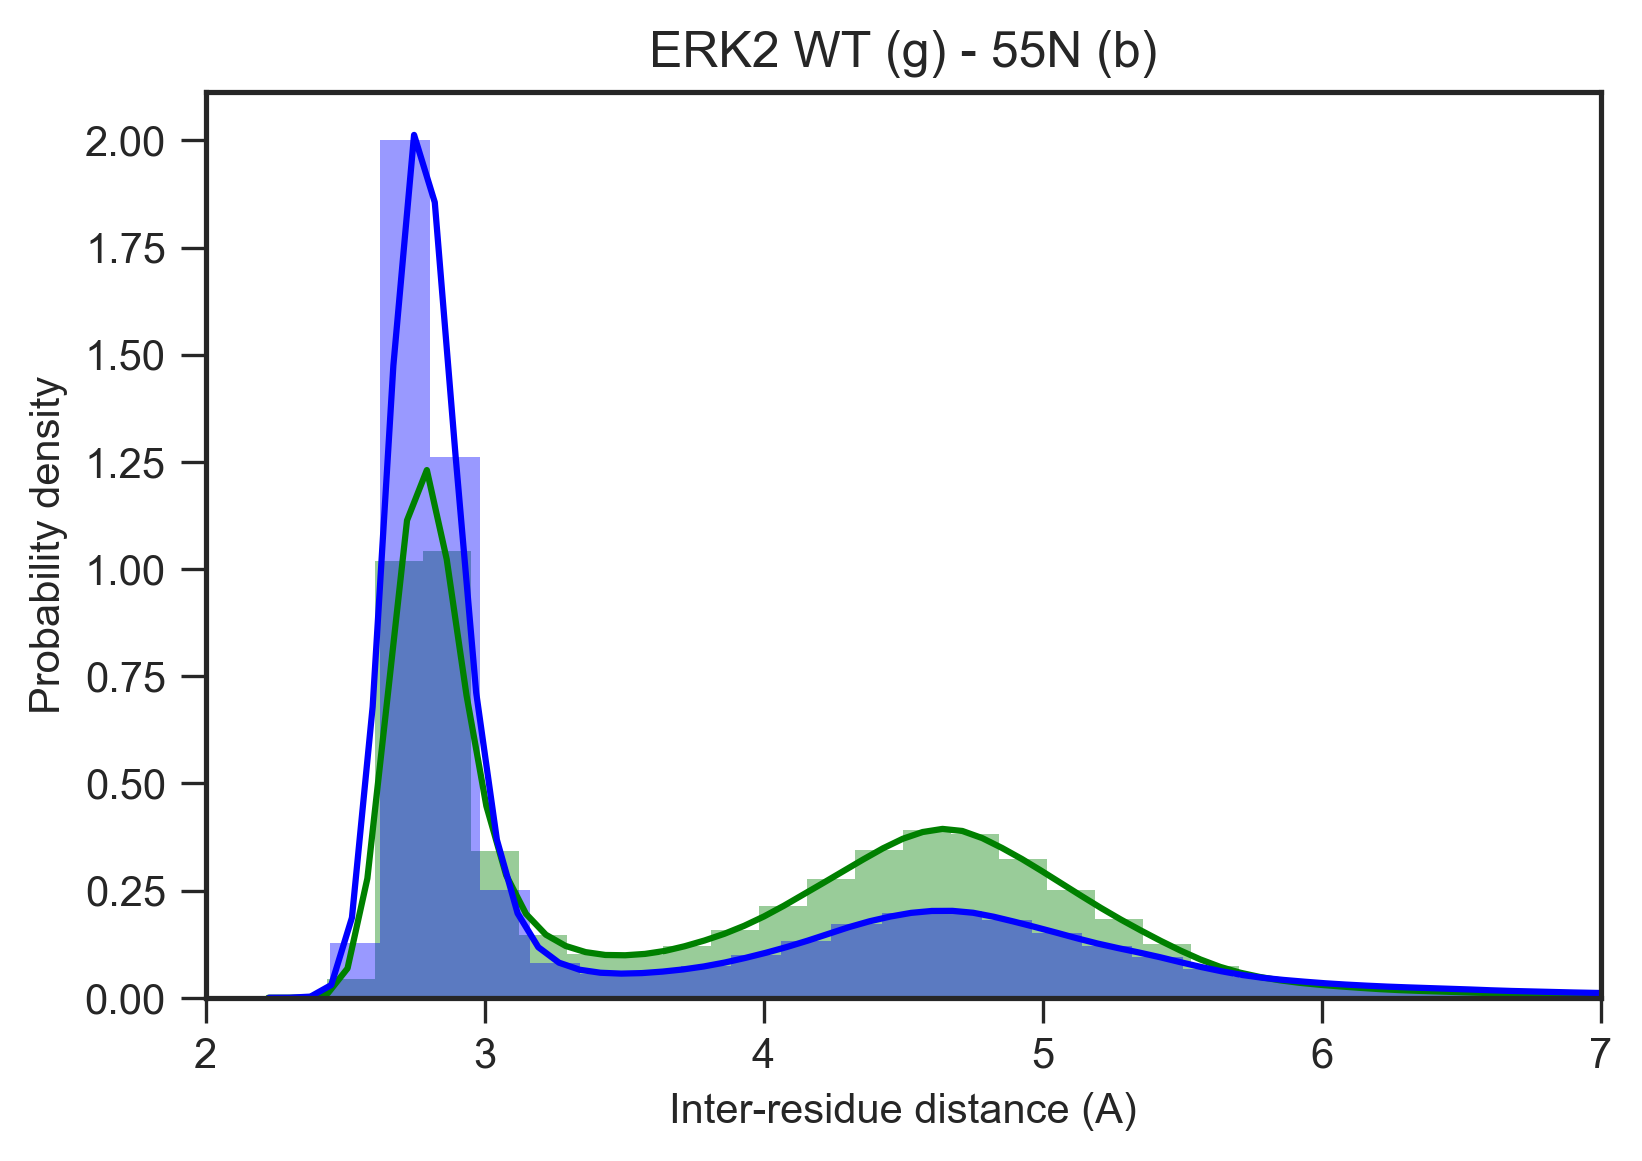

In [173]:
plt.figure(dpi=300)
sns.distplot(dist2_concat[:,1]*10, color='green')
sns.distplot(dist3_concat[:,1]*10, color='blue')
plt.xlabel('Inter-residue distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2 WT (g) - 55N (b)')
plt.show()

In [171]:
np.sum(dist2_concat[:,1] < 0.35) / len(dist2_concat[:,1]), np.sum(dist3_concat[:,1] < 0.35) / len(dist3_concat[:,1])

(0.46690596948059493, 0.67863437861727871)

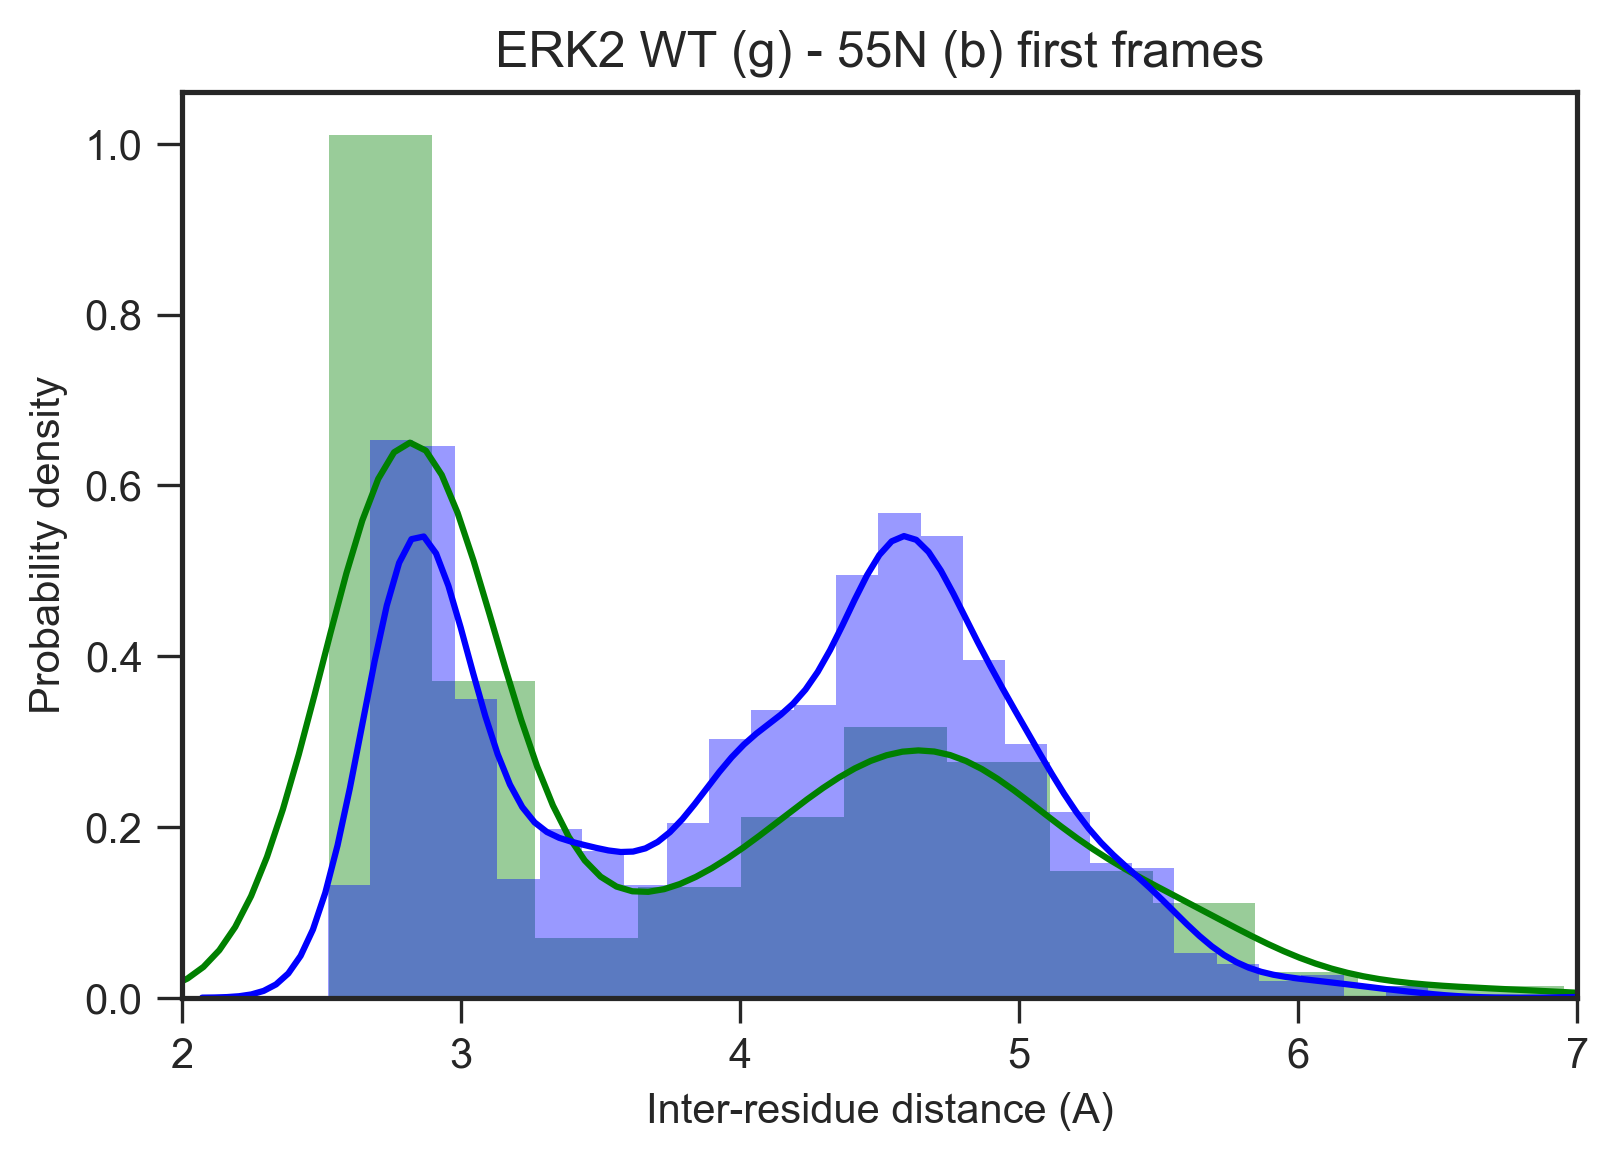

In [174]:
plt.figure(dpi=300)
sns.distplot([x[1]*10 for x in dist2_1stframes], color='green')
sns.distplot([x[1]*10 for x in dist3_1stframes]*10, color='blue')
plt.xlabel('Inter-residue distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2 WT (g) - 55N (b) first frames')
plt.show()

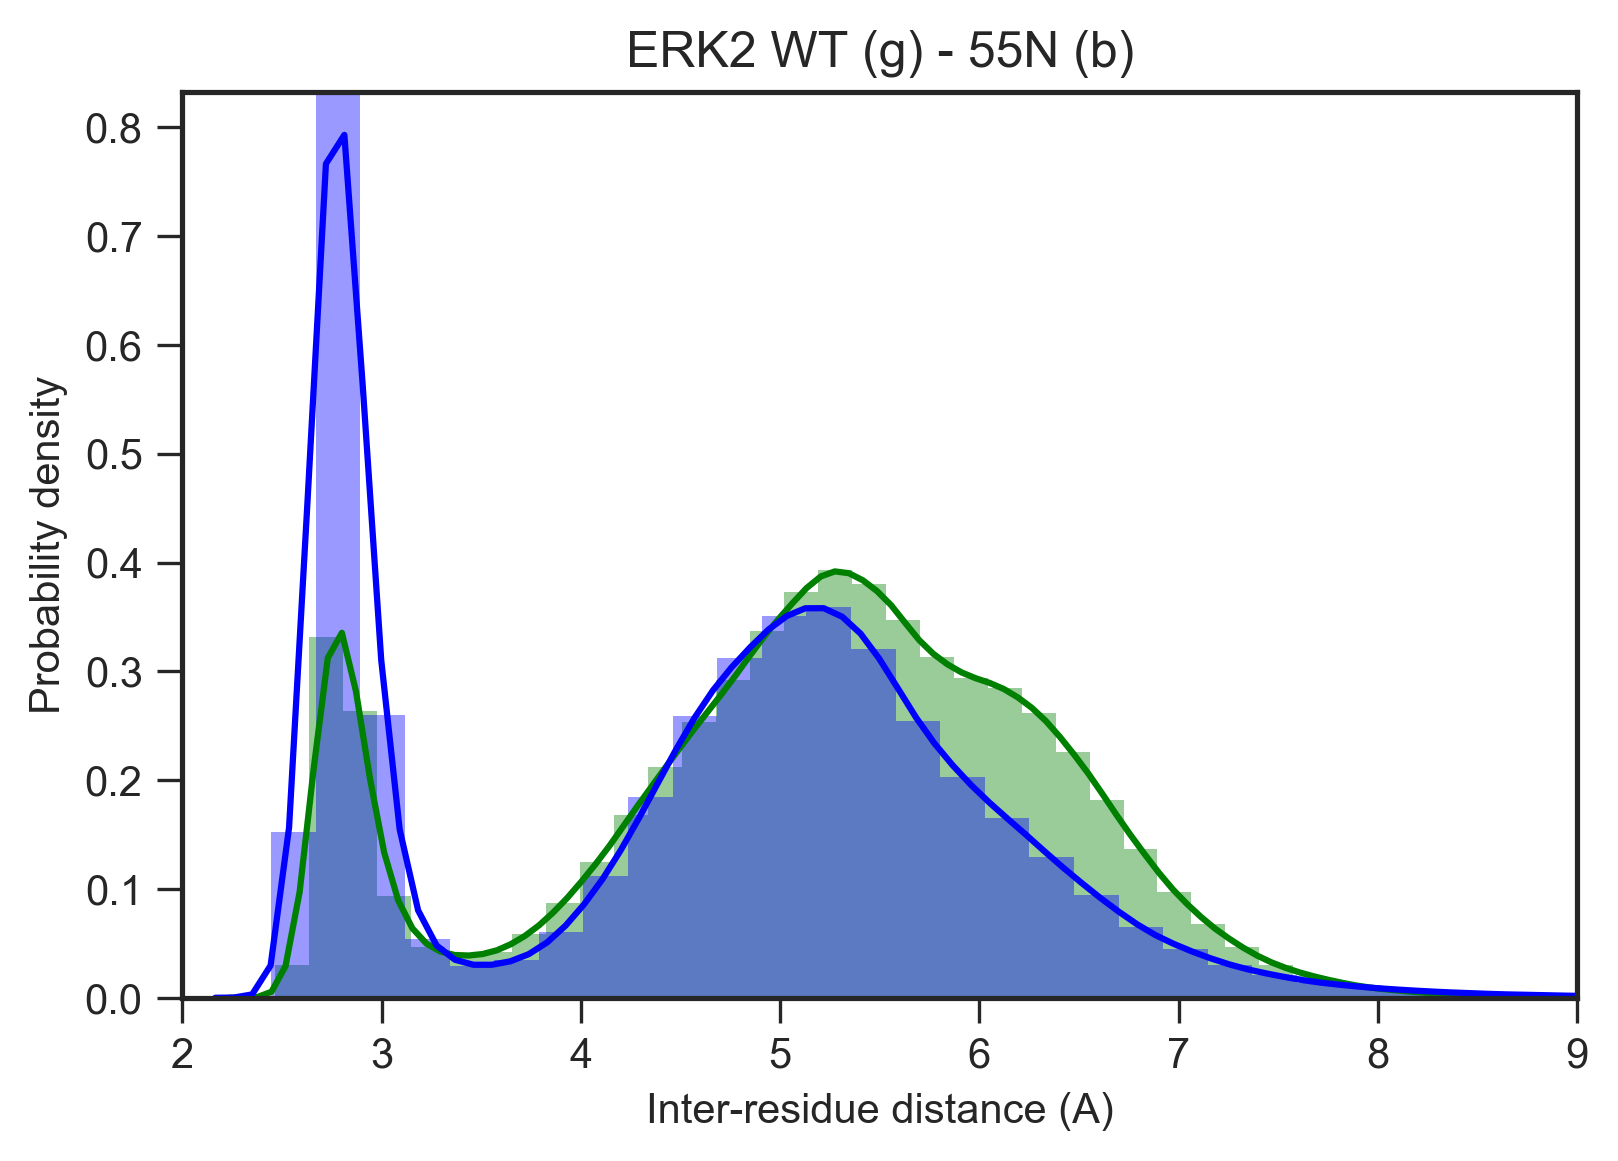

In [175]:
plt.figure(dpi=300)
sns.distplot(dist2_concat[:,2]*10, color='green')
sns.distplot(dist3_concat[:,2]*10, color='blue')
plt.xlabel('Inter-residue distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,9))
plt.title('ERK2 WT (g) - 55N (b)')
plt.show()

In [172]:
np.sum(dist2_concat[:,2] < 0.35) / len(dist2_concat[:,2]), np.sum(dist3_concat[:,2] < 0.35) / len(dist3_concat[:,2])

(0.13751984203801929, 0.31663246694026448)

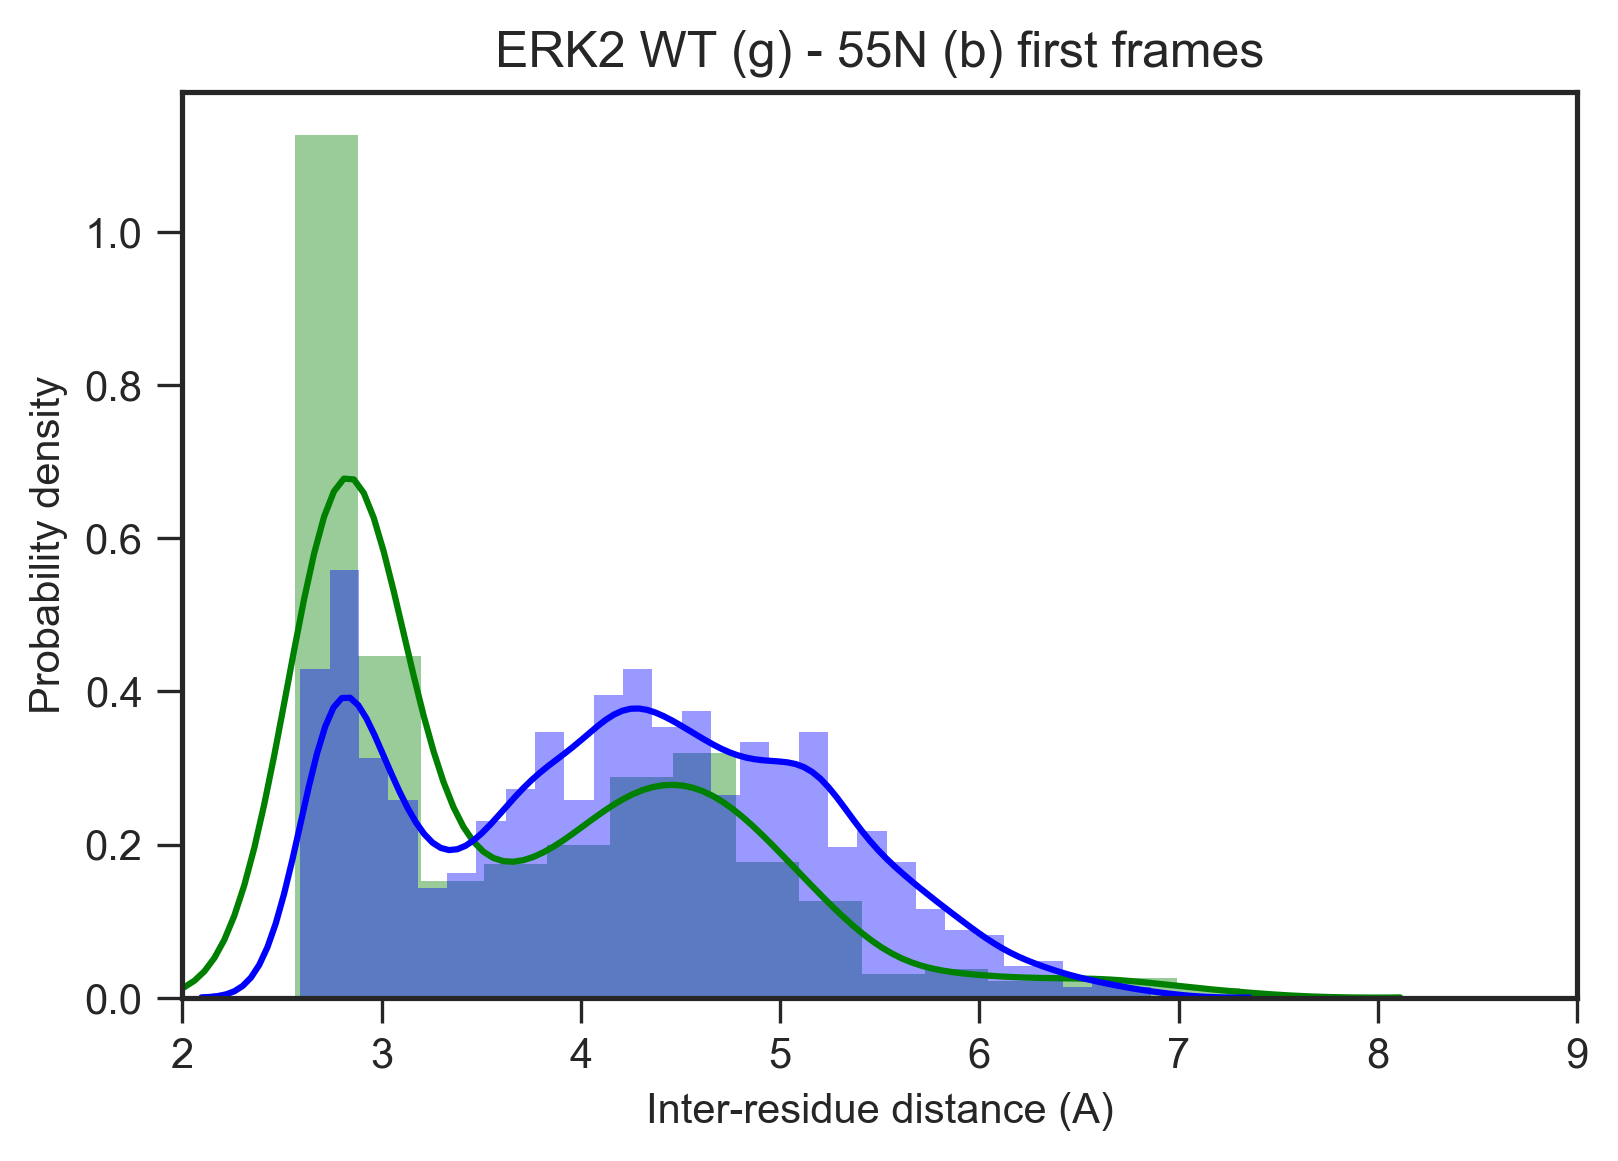

In [176]:
plt.figure(dpi=300)
sns.distplot([x[2]*10 for x in dist2_1stframes], color='green')
sns.distplot([x[2]*10 for x in dist3_1stframes]*10, color='blue')
plt.xlabel('Inter-residue distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,9))
plt.title('ERK2 WT (g) - 55N (b) first frames')
plt.show()

In [165]:
# ok great so both of these are fine

In [177]:
# let's try to make an MSM in the space of these distances

In [179]:
import pyemma

/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.4, you have 2.5.2.
  .format(latest=latest, current=current), category=UserWarning)


In [182]:
tica = pyemma.coordinates.tica([x[0] for x in distances2], lag=10, kinetic_map=False, commute_map=True)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=998), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [184]:
kmeans = pyemma.coordinates.cluster_kmeans(tica, k=100, max_iter=100)

HBox(children=(HBox(children=(Label(value='creating data array'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

03-12-18 21:54:53 pyemma.coordinates.clustering.kmeans.KmeansClustering[4] INFO     Cluster centers converged after 59 steps.


In [194]:
dtrajs = kmeans.get_output()
dtrajs = [np.concatenate(x) for x in dtrajs]

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [190]:
its = pyemma.msm.its([np.concatenate(x) for x in dtrajs])

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

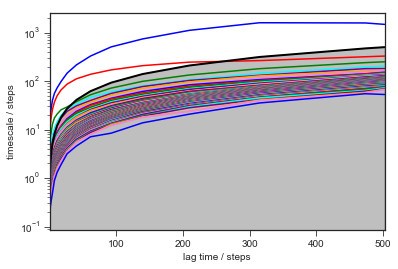

In [191]:
pyemma.plots.plot_implied_timescales(its)

In [196]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)

In [197]:
msm.nstates

100

In [198]:
pcca = msm.pcca(2)

In [199]:
pcca.coarse_grained_stationary_probability

array([ 0.00677116,  0.99322884])

In [200]:
# yeah this is not interesting to me

In [202]:
# ok then back to distances - let's look at the other 2 mutants

In [203]:
distances4 = np.load('distances4_liam.npy')
dist4_concat = np.concatenate([distances4[i][0][100:] for i in range(len(distances4))])

distances5 = np.load('distances5_liam.npy')
dist5_concat = np.concatenate([distances5[i][0][100:] for i in range(len(distances5))])

In [304]:
# dist = 0

# plt.figure(dpi=200)
# sns.distplot(dist2_concat[:,dist]*10, color='green')
# sns.distplot(dist3_concat[:,dist]*10, color='blue')
# sns.distplot(dist4_concat[:,dist]*10, color='yellow')
# sns.distplot(dist5_concat[:,dist]*10, color='black')
# plt.xlabel('Inter-residue distance (A)')
# plt.ylabel('Probability density')
# plt.xlim((2,7))
# plt.title('ERK2: WT(g), 55N(b), Q102M(y), 55N-Q102M(bck)')
# plt.show()

In [315]:
dist = 12

scipy.stats.ks_2samp(dist2_concat[:,dist], dist3_concat[:,dist])

Ks_2sampResult(statistic=0.0085246692575001726, pvalue=4.2656240036877292e-29)

In [316]:
scipy.stats.ks_2samp(dist2_concat[:,dist], dist4_concat[:,dist])

Ks_2sampResult(statistic=0.057678616872790078, pvalue=0.0)

In [317]:
scipy.stats.ks_2samp(dist2_concat[:,dist], dist5_concat[:,dist])

Ks_2sampResult(statistic=0.11229635364171842, pvalue=0.0)

In [268]:
# differences for all mutants - I'm taking those with the KS statistic > 0.1:

# 55N: 1,2,8
# Q102M: 0,1,2,7,8
# 55N-Q102M: 1,2,7,8,12

In [303]:
# let's plot all these for all mutants at the same time, and get proportions

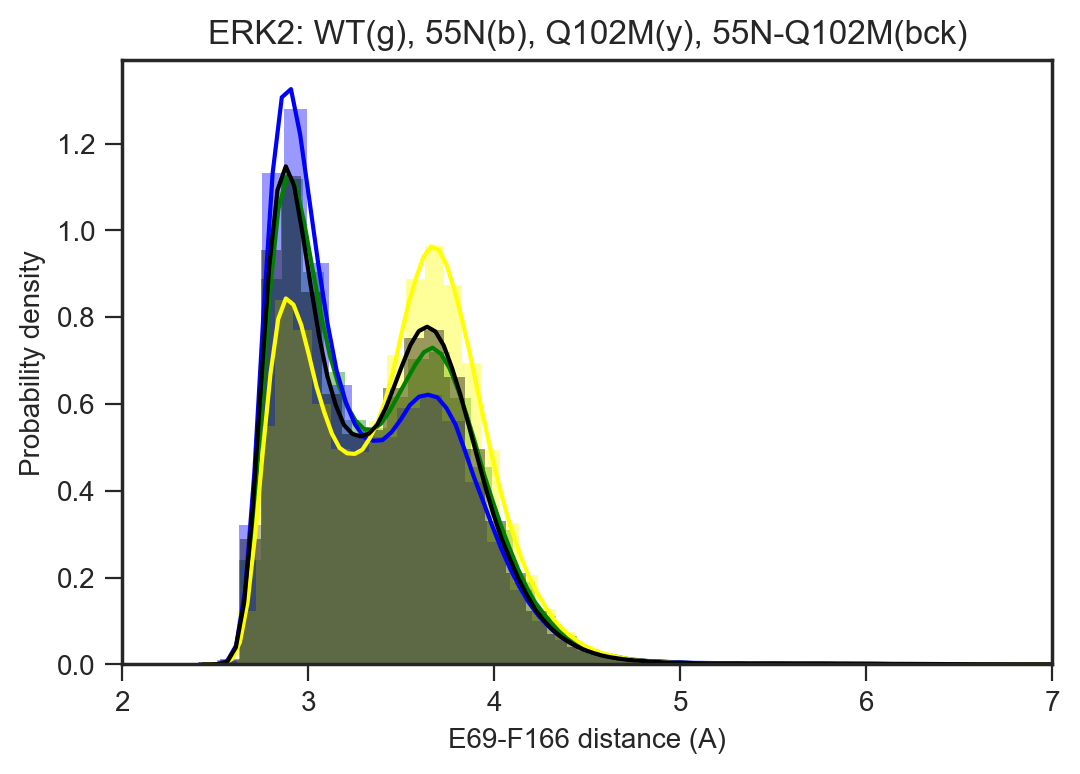

In [321]:
dist = 0

plt.figure(dpi=200)
sns.distplot(dist2_concat[:,dist]*10, color='green')
sns.distplot(dist3_concat[:,dist]*10, color='blue')
sns.distplot(dist4_concat[:,dist]*10, color='yellow')
sns.distplot(dist5_concat[:,dist]*10, color='black')
plt.xlabel('E69-F166 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2: WT(g), 55N(b), Q102M(y), 55N-Q102M(bck)')
plt.show()

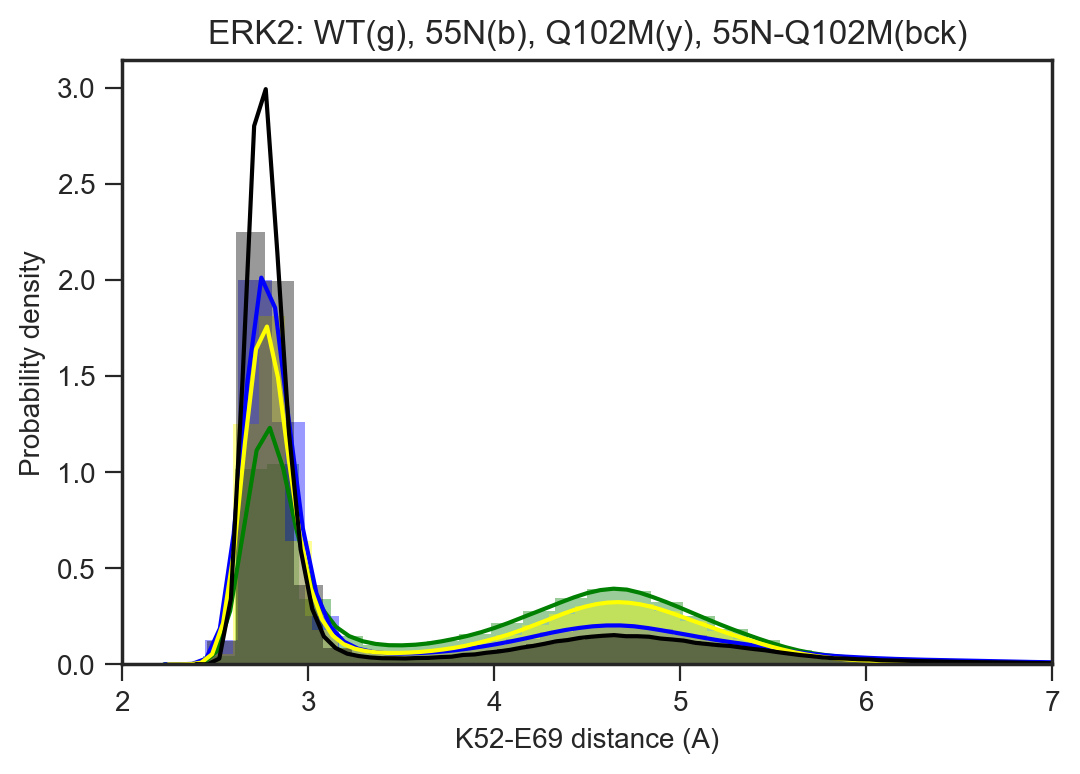

In [322]:
dist = 1

plt.figure(dpi=200)
sns.distplot(dist2_concat[:,dist]*10, color='green')
sns.distplot(dist3_concat[:,dist]*10, color='blue')
sns.distplot(dist4_concat[:,dist]*10, color='yellow')
sns.distplot(dist5_concat[:,dist]*10, color='black')
plt.xlabel('K52-E69 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK2: WT(g), 55N(b), Q102M(y), 55N-Q102M(bck)')
plt.show()

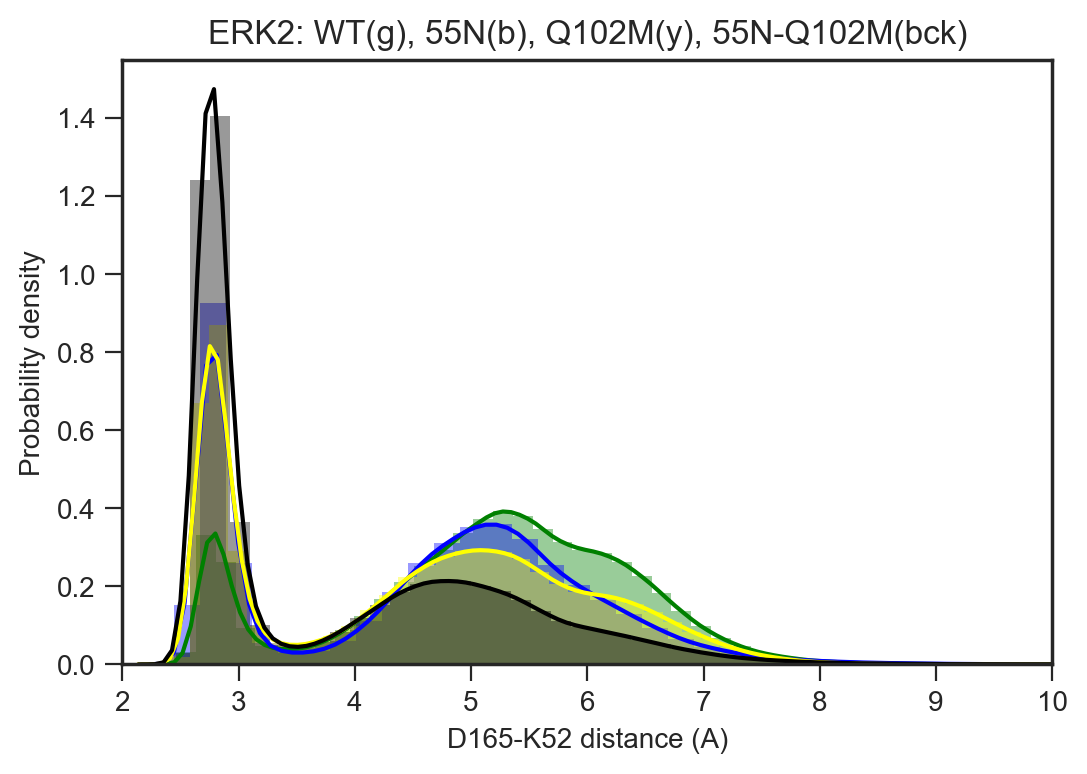

In [323]:
dist = 2

plt.figure(dpi=200)
sns.distplot(dist2_concat[:,dist]*10, color='green')
sns.distplot(dist3_concat[:,dist]*10, color='blue')
sns.distplot(dist4_concat[:,dist]*10, color='yellow')
sns.distplot(dist5_concat[:,dist]*10, color='black')
plt.xlabel('D165-K52 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,10))
plt.title('ERK2: WT(g), 55N(b), Q102M(y), 55N-Q102M(bck)')
plt.show()

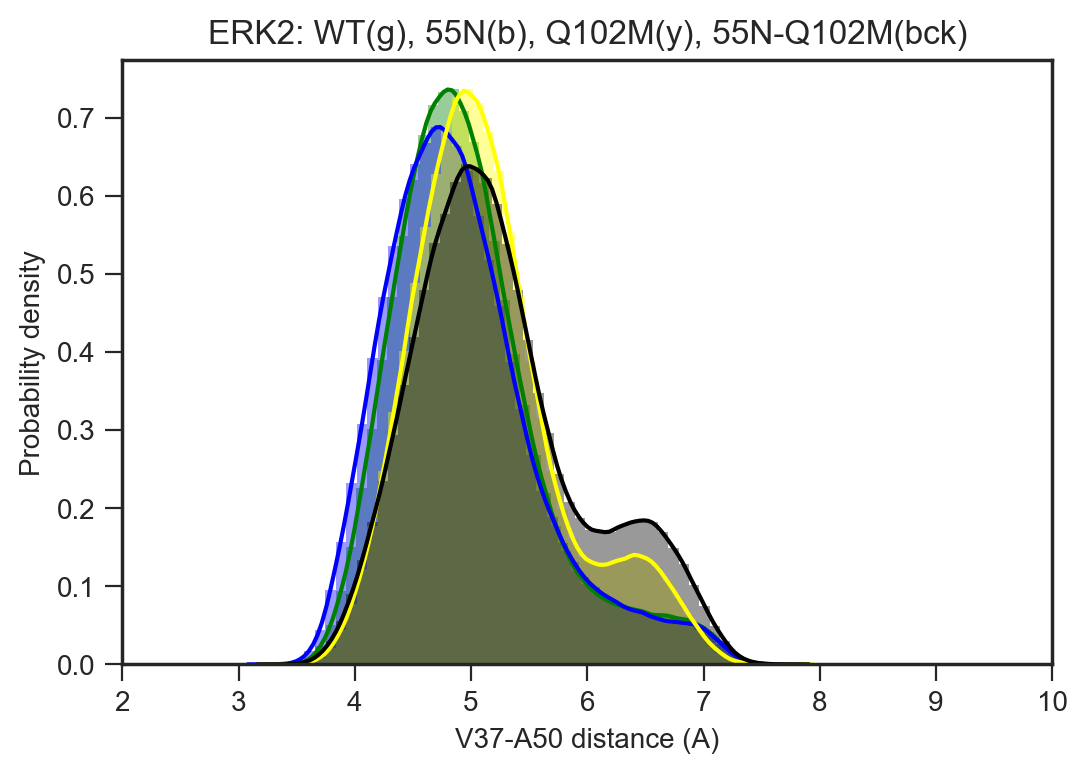

In [327]:
dist = 7

plt.figure(dpi=200)
sns.distplot(dist2_concat[:,dist]*10, color='green')
sns.distplot(dist3_concat[:,dist]*10, color='blue')
sns.distplot(dist4_concat[:,dist]*10, color='yellow')
sns.distplot(dist5_concat[:,dist]*10, color='black')
plt.xlabel('V37-A50 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,10))
plt.title('ERK2: WT(g), 55N(b), Q102M(y), 55N-Q102M(bck)')
plt.show()

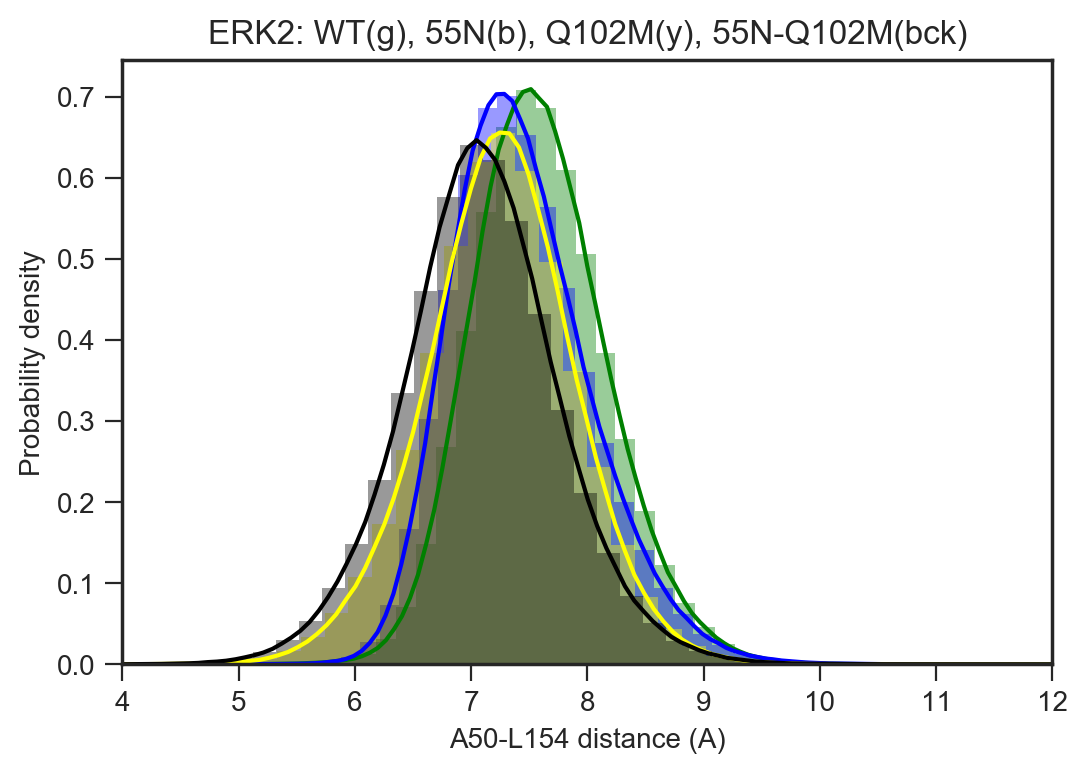

In [325]:
dist = 8

plt.figure(dpi=200)
sns.distplot(dist2_concat[:,dist]*10, color='green')
sns.distplot(dist3_concat[:,dist]*10, color='blue')
sns.distplot(dist4_concat[:,dist]*10, color='yellow')
sns.distplot(dist5_concat[:,dist]*10, color='black')
plt.xlabel('A50-L154 distance (A)')
plt.ylabel('Probability density')
plt.xlim((4,12))
plt.title('ERK2: WT(g), 55N(b), Q102M(y), 55N-Q102M(bck)')
plt.show()

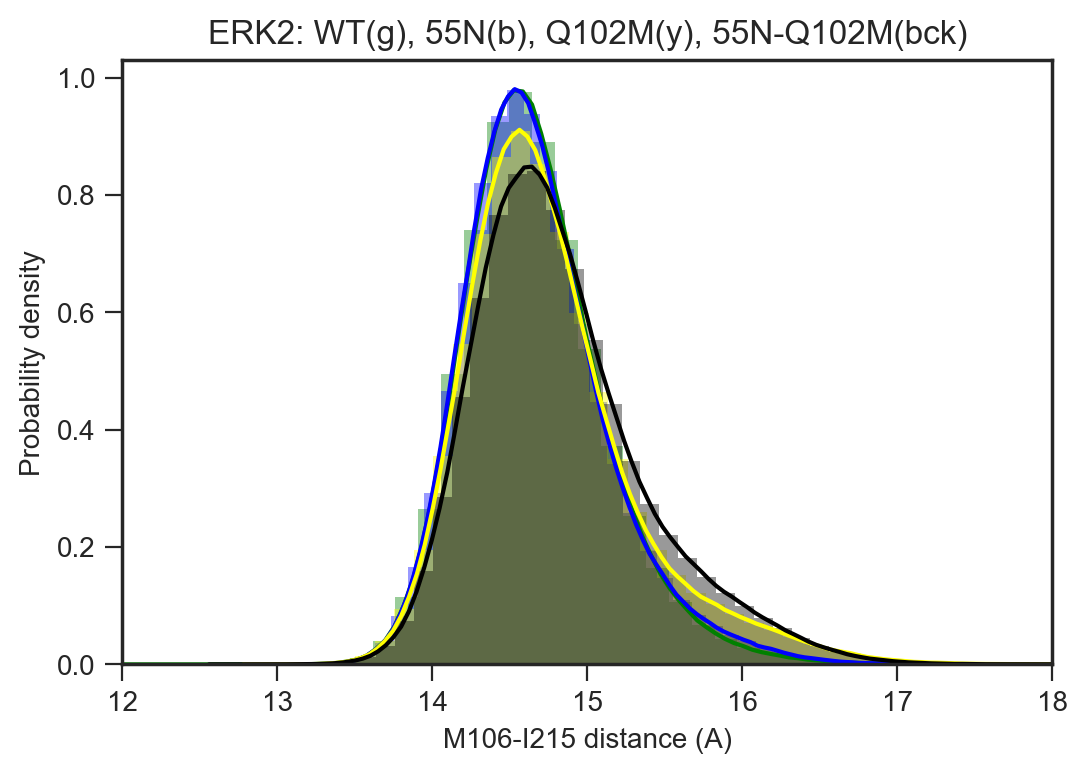

In [326]:
dist = 12

plt.figure(dpi=200)
sns.distplot(dist2_concat[:,dist]*10, color='green')
sns.distplot(dist3_concat[:,dist]*10, color='blue')
sns.distplot(dist4_concat[:,dist]*10, color='yellow')
sns.distplot(dist5_concat[:,dist]*10, color='black')
plt.xlabel('M106-I215 distance (A)')
plt.ylabel('Probability density')
plt.xlim((12,18))
plt.title('ERK2: WT(g), 55N(b), Q102M(y), 55N-Q102M(bck)')
plt.show()

In [328]:
# now ERK1 distances

In [51]:
distances0 = np.load('distances0_liam.npy')
dist0_concat = np.concatenate([distances0[i][0][100:] for i in range(len(distances0))])

distances1 = np.load('distances1_liam.npy')
dist1_concat = np.concatenate([distances1[i][0][100:] for i in range(len(distances1))])

In [1]:
import scipy

In [65]:
dist = 4

scipy.stats.ks_2samp(dist0_concat[:,dist], dist1_concat[:,dist])

Ks_2sampResult(statistic=0.13365317631298557, pvalue=0.0)

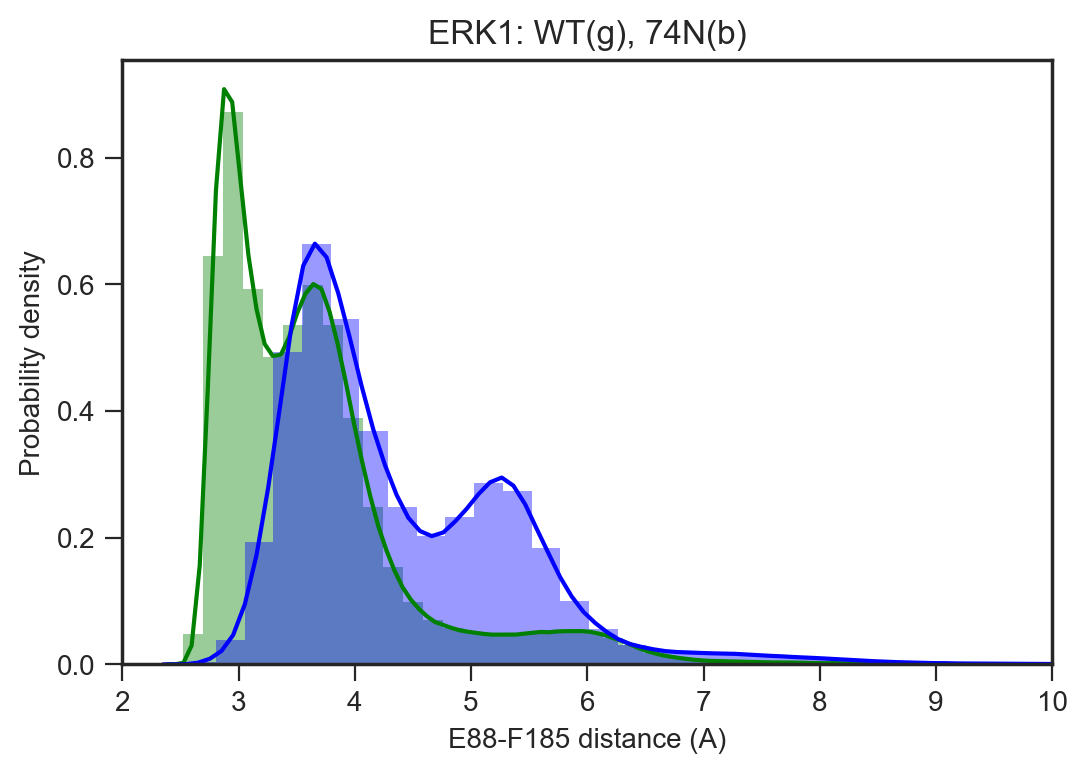

In [58]:
dist = 0

plt.figure(dpi=200)
sns.distplot(dist0_concat[:,dist]*10, color='green')
sns.distplot(dist1_concat[:,dist]*10, color='blue')
plt.xlabel('E88-F185 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,10))
plt.title('ERK1: WT(g), 74N(b)')
plt.show()

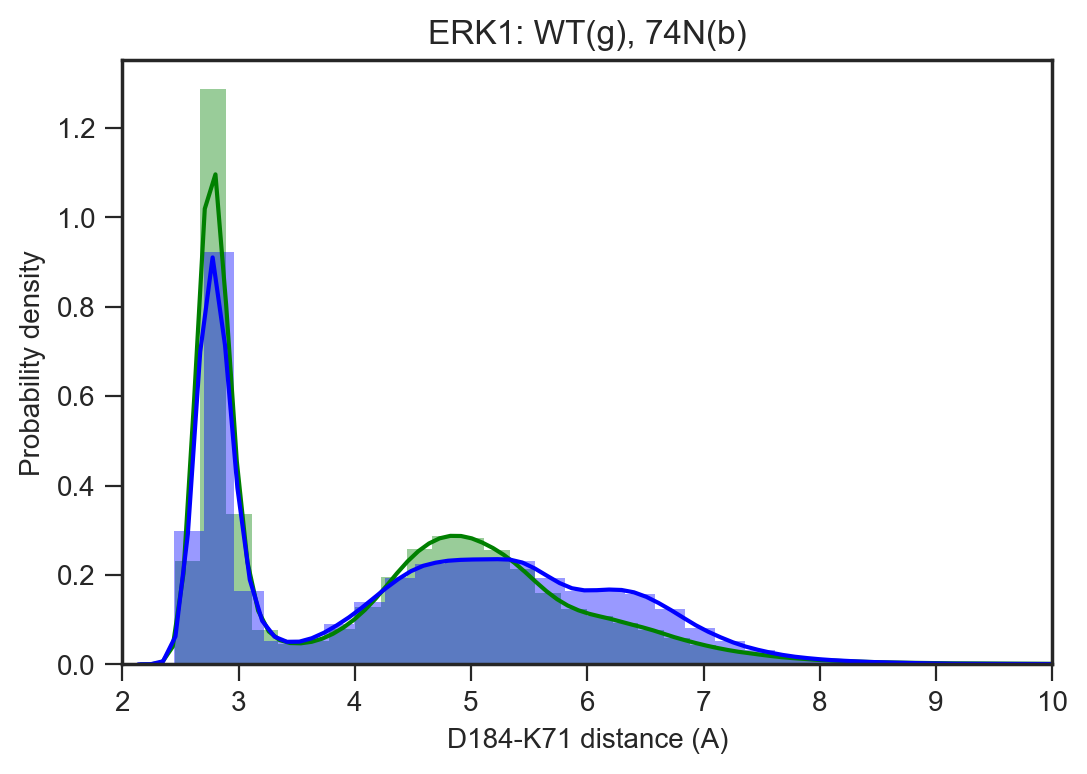

In [59]:
dist = 2

plt.figure(dpi=200)
sns.distplot(dist0_concat[:,dist]*10, color='green')
sns.distplot(dist1_concat[:,dist]*10, color='blue')
plt.xlabel('D184-K71 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,10))
plt.title('ERK1: WT(g), 74N(b)')
plt.show()

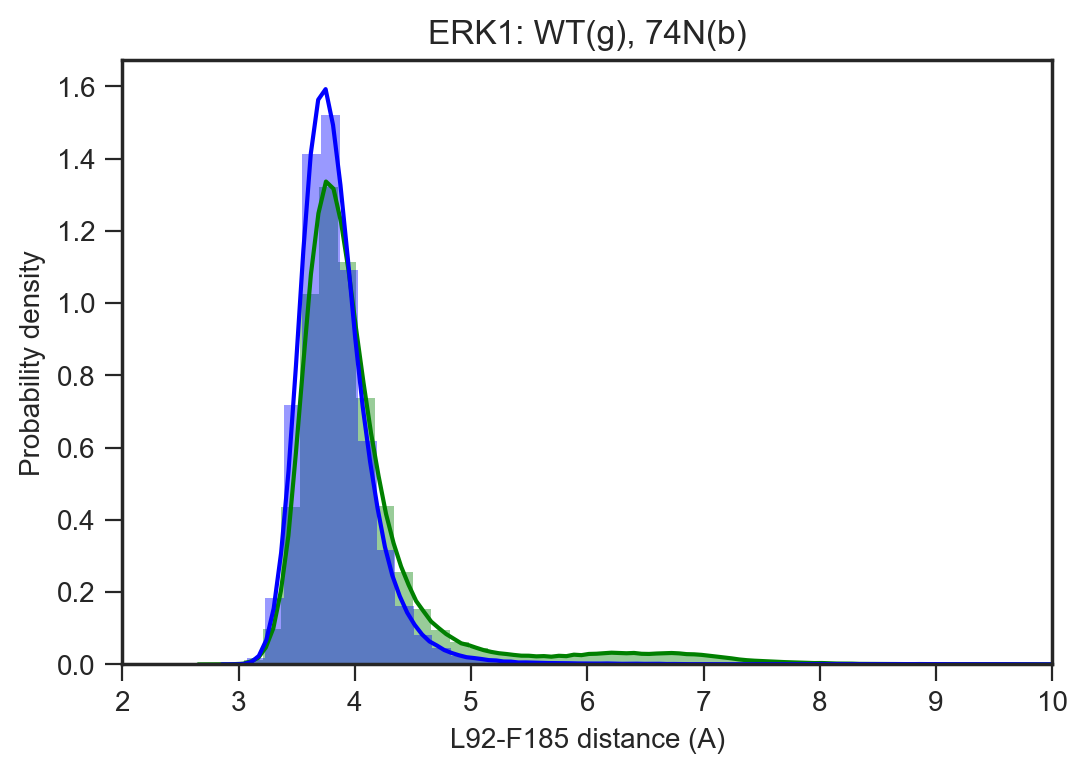

In [60]:
dist = 4

plt.figure(dpi=200)
sns.distplot(dist0_concat[:,dist]*10, color='green')
sns.distplot(dist1_concat[:,dist]*10, color='blue')
plt.xlabel('L92-F185 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,10))
plt.title('ERK1: WT(g), 74N(b)')
plt.show()

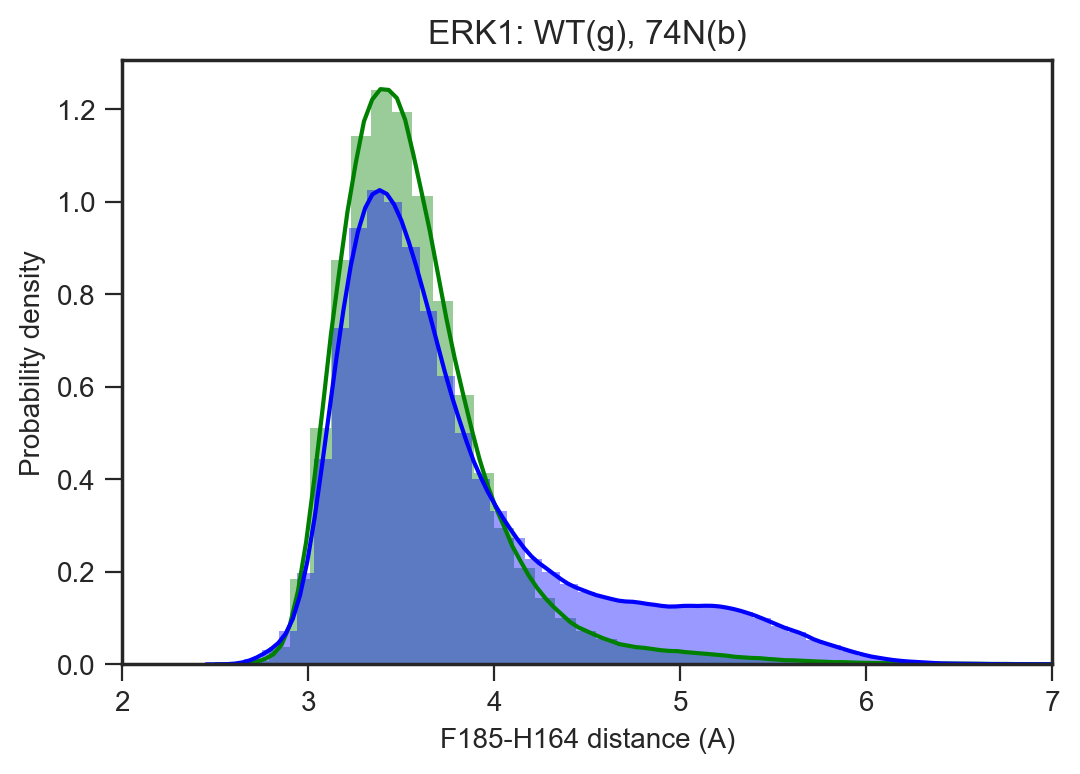

In [61]:
dist = 5

plt.figure(dpi=200)
sns.distplot(dist0_concat[:,dist]*10, color='green')
sns.distplot(dist1_concat[:,dist]*10, color='blue')
plt.xlabel('F185-H164 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,7))
plt.title('ERK1: WT(g), 74N(b)')
plt.show()

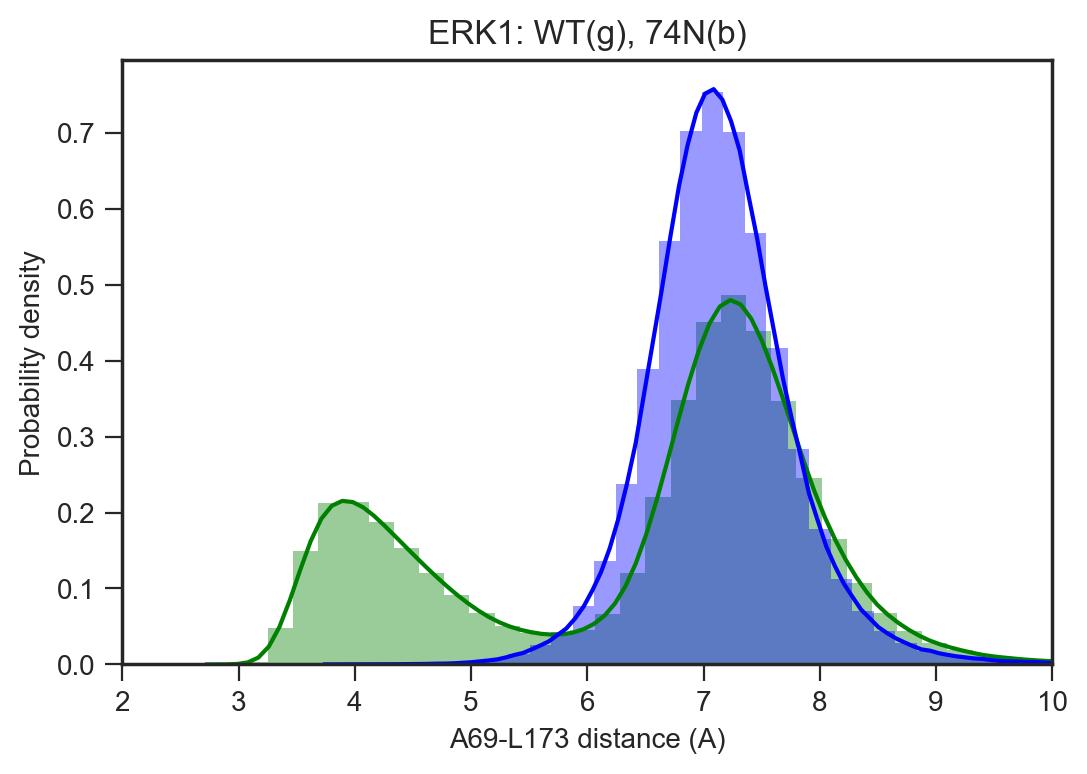

In [62]:
dist = 8

plt.figure(dpi=200)
sns.distplot(dist0_concat[:,dist]*10, color='green')
sns.distplot(dist1_concat[:,dist]*10, color='blue')
plt.xlabel('A69-L173 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,10))
plt.title('ERK1: WT(g), 74N(b)')
plt.show()

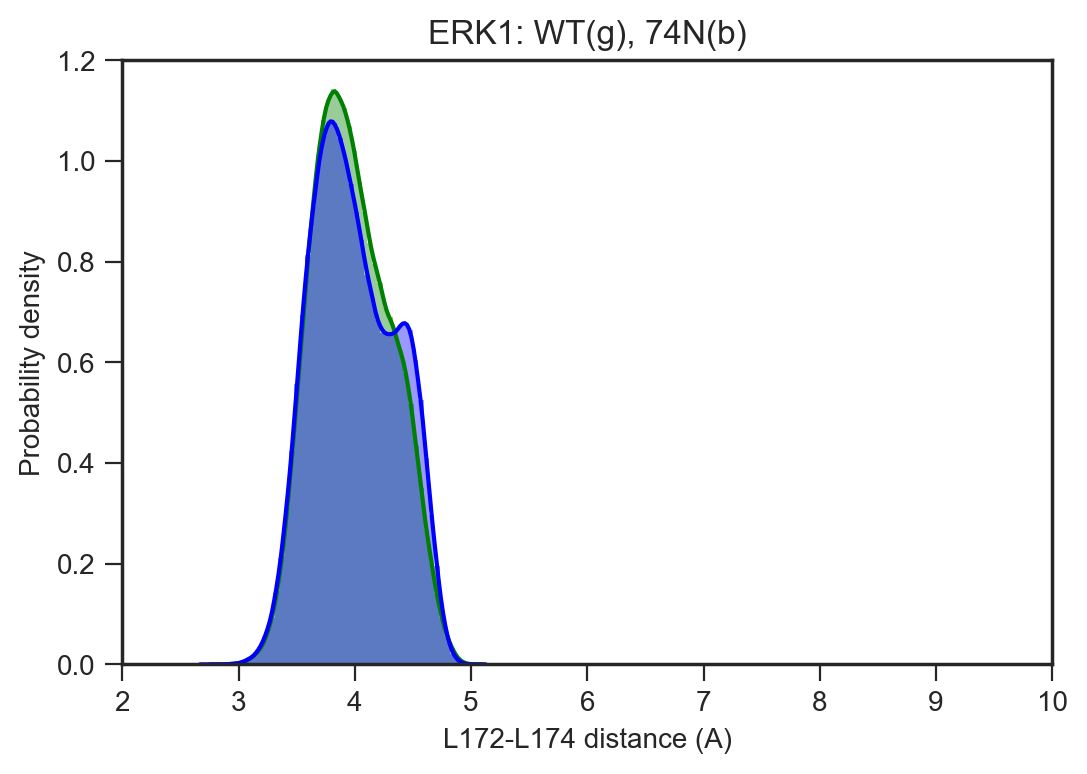

In [63]:
dist = 9

plt.figure(dpi=200)
sns.distplot(dist0_concat[:,dist]*10, color='green')
sns.distplot(dist1_concat[:,dist]*10, color='blue')
plt.xlabel('L172-L174 distance (A)')
plt.ylabel('Probability density')
plt.xlim((2,10))
plt.title('ERK1: WT(g), 74N(b)')
plt.show()